# **Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist**
- **Nama:** Ach. Arif Setiawan
- **Email:** arifsetiawan3014@gmail.com
- **ID Dicoding:** setiawanttt

Dataset ini berisi informasi tentang **100 ribu pesanan** yang dilakukan antara tahun **2016 hingga 2018** di berbagai marketplace di **Brasil**. Dataset ini mencakup berbagai aspek pesanan, seperti status pesanan, harga, pembayaran, dan performa pengiriman, hingga lokasi pelanggan, atribut produk, dan ulasan yang ditulis oleh pelanggan. Selain itu, tersedia juga dataset geolokasi yang menghubungkan kode pos Brasil dengan koordinat lintang dan bujur. Data ini merupakan data komersial nyata yang telah dianonimkan. Referensi mengenai perusahaan dan mitra dalam teks ulasan telah diganti dengan nama-nama keluarga besar dari serial Game of Thrones. Dataset ini disediakan oleh **Olist**, sebuah platform yang menghubungkan bisnis kecil di seluruh Brasil dengan berbagai marketplace melalui kontrak tunggal. Penjual dapat menjual produk mereka melalui Olist Store dan mengirimkannya langsung kepada pelanggan menggunakan mitra logistik Olist. Setelah pelanggan membeli produk dari Olist Store, penjual akan diberi notifikasi untuk memproses pesanan tersebut. Setelah barang diterima pelanggan, atau ketika tanggal estimasi pengiriman tercapai, pelanggan akan menerima survei kepuasan melalui email untuk memberikan penilaian dan komentar terkait pengalaman pembelian.

## **1. Menentukan Pertanyaan Bisnis**

| No. | Business Question |
|-----|-------------------|
|1|Bagaimana segmentasi pelanggan berdasarkan perilaku pembelian dalam beberapa tahun terakhir?|
|2|Wilayah mana yang memiliki Rata-Rata volume pembelian tertinggi dalam beberapa tahun terakhir?|
|3|Bagaimana pola perilaku kelompok pelanggan berdasarkan frekuensi pembelian dan jenis produk selama beberapa tahun terakhir?|
|4|Apakah terdapat pola atau hubungan antara metode pembayaran tertentu dengan nilai transaksi rata-rata dalam beberapa tahun terakhir?|
|5|Bagaimana hubungan antara jumlah foto, panjang deskripsi, dan harga produk dengan frekuensi pembelian pada kategori produk dalam beberapa tahun terakhir?|
|6|Bagaimana pola atau hubungan antara waktu pengiriman dan rating ulasan pelanggan dalam beberapa tahun terakhir?|

## **2. Import Semua Packages/Library yang Digunakan**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## **3. Data Wrangling**

### **3.1 Gathering Data**

Dataset Brazilian E-Commerce Public Dataset by Olist dapat diunduh melalui laman [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data?select=olist_orders_dataset.csv). Data ini dibagi menjadi beberapa dataset untuk mempermudah pemahaman dan pengorganisasian. Silakan merujuk pada skema data berikut saat bekerja dengan dataset ini:

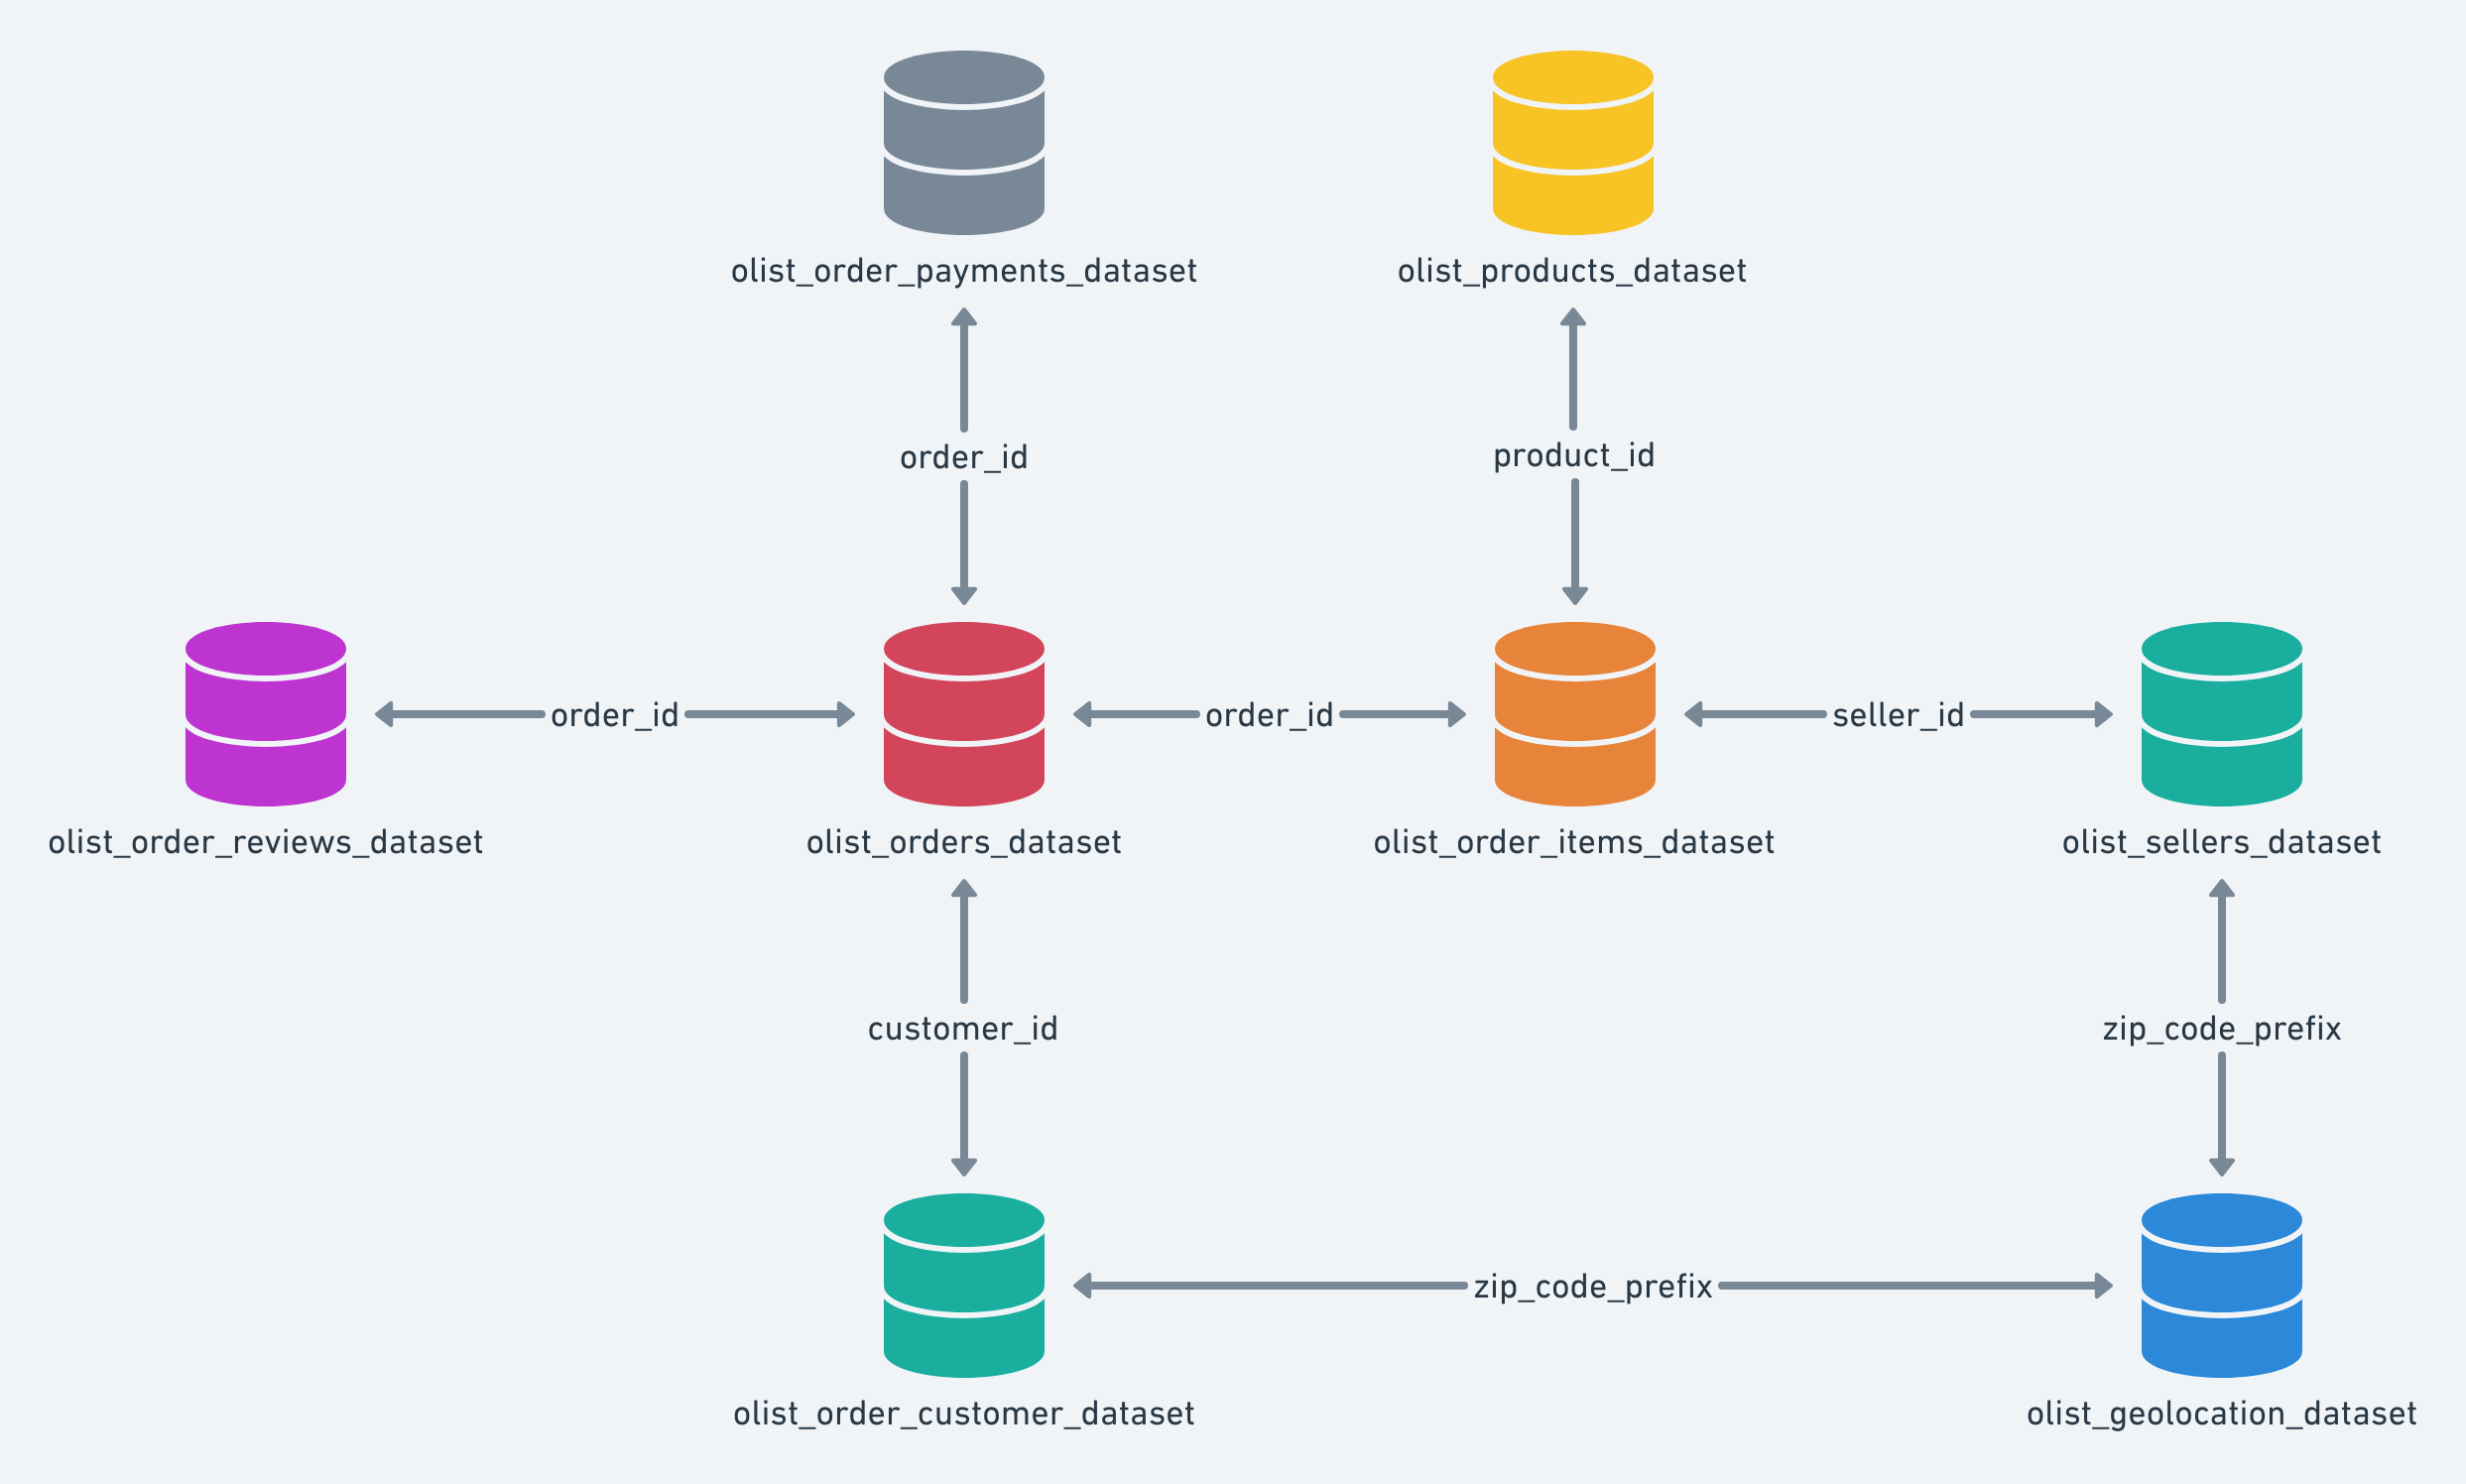

#### **3.1.1 Customers Dataset**

Dataset ini berisi informasi tentang **pelanggan dan lokasi** mereka. Gunakan dataset ini untuk mengidentifikasi pelanggan unik dalam Orders Dataset dan menemukan lokasi pengiriman pesanan. Dalam sistem kami, setiap pesanan diberikan kepada customer_id yang unik. Artinya, pelanggan yang sama akan mendapatkan ID yang berbeda untuk pesanan yang berbeda. Tujuan adanya customer_unique_id dalam dataset ini adalah untuk memungkinkan Anda mengidentifikasi pelanggan yang melakukan pembelian ulang di toko. Tanpa customer_unique_id, Anda akan menemukan bahwa setiap pesanan memiliki pelanggan yang berbeda yang terkait dengannya.

| No. | Variabel                  | Jenis Data  | Deskripsi                                                   |
|-----|---------------------------|-------------|-------------------------------------------------------------|
| 1   | customer_id               | Kategorik   | Kunci untuk *Orders Dataset*. Setiap pesanan memiliki *customer_id* yang unik. |
| 2   | customer_unique_id        | Kategorik   | Identifikasi unik untuk setiap pelanggan.                   |
| 3   | customer_zip_code_prefix  | Numerik     | Lima digit pertama dari kode pos pelanggan.                 |
| 4   | customer_city             | Kategorik   | Nama kota pelanggan.                                        |
| 5   | customer_state            | Kategorik   | Negara bagian pelanggan.                                    |

In [2]:
customers_df = pd.read_csv('./data/olist_customers_dataset.csv')
customers_df

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

#### **3.1.2 Geolocation Dataset**

Dataset ini berisi informasi tentang **kode pos** di Brasil beserta **koordinat** lintang dan bujurnya (lat/lng). Gunakan dataset ini untuk membuat peta dan menghitung jarak antara penjual dan pelanggan.

| No. | Variabel                     | Jenis Data  | Deskripsi                       |
|-----|------------------------------|-------------|----------------------------------|
| 1   | geolocation_zip_code_prefix  | Numerik     | Lima digit pertama dari kode pos. |
| 2   | geolocation_lat              | Numerik     | Koordinat lintang (*latitude*).   |
| 3   | geolocation_lng              | Numerik     | Koordinat bujur (*longitude*).   |
| 4   | geolocation_city             | Kategorik   | Nama kota.                      |
| 5   | geolocation_state            | Kategorik   | Negara bagian.                  |


In [3]:
geolocation_df = pd.read_csv('./data/olist_geolocation_dataset.csv')
geolocation_df

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

#### **3.1.3 Order Items Dataset**

Dataset ini berisi data tentang **barang yang dibeli** dalam setiap pesanan.

**Contoh:**

Pesanan dengan **order_id** = 00143d0f86d6fbd9f9b38ab440ac16f5 memiliki 3 item (produk yang sama). Setiap item memiliki biaya pengiriman yang dihitung sesuai dengan ukuran dan beratnya. Untuk mendapatkan total nilai pengiriman untuk setiap pesanan, Anda hanya perlu menjumlahkan.

* Total nilai order_item: 21.33 * 3 = 63.99
* Total nilai pengiriman: 15.10 * 3 = 45.30
* Total nilai pesanan (produk + pengiriman): 45.30 + 63.99 = 109.29

| No. | Variabel                | Jenis Data  | Deskripsi                                                                 |
|-----|-------------------------|-------------|---------------------------------------------------------------------------|
| 1   | order_id                | Kategorik   | Identifikasi unik untuk pesanan.                                          |
| 2   | order_item_id           | Numerik     | Nomor urut yang mengidentifikasi jumlah item yang termasuk dalam pesanan yang sama. |
| 3   | product_id              | Kategorik   | Identifikasi unik untuk produk.                                           |
| 4   | seller_id               | Kategorik   | Identifikasi unik untuk penjual.                                          |
| 5   | shipping_limit_date     | Tanggal     | Menunjukkan tanggal batas waktu pengiriman oleh penjual untuk menyerahkan pesanan kepada mitra logistik. |
| 6   | price                   | Numerik     | Harga per item.                                                           |
| 7   | freight_value           | Numerik     | Nilai biaya pengiriman per item (jika pesanan memiliki lebih dari satu item, biaya pengiriman dibagi antara item-item tersebut). |


In [4]:
orderitem_df = pd.read_csv('./data/olist_order_items_dataset.csv')
orderitem_df

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

#### **3.1.4 Payments Dataset**

Dataset ini berisi data tentang **opsi pembayaran** untuk setiap pesanan.

| No. | Variabel             | Jenis Data  | Deskripsi                                                                 |
|-----|----------------------|-------------|---------------------------------------------------------------------------|
| 1   | order_id             | Kategorik   | Identifikasi unik untuk pesanan.                                          |
| 2   | payment_sequential   | Numerik     | Seorang pelanggan dapat membayar pesanan dengan lebih dari satu metode pembayaran. Jika demikian, urutan akan dibuat untuk mengakomodasi semua pembayaran. |
| 3   | payment_type         | Kategorik   | Metode pembayaran yang dipilih oleh pelanggan.                            |
| 4   | payment_installments | Numerik     | Jumlah cicilan yang dipilih oleh pelanggan.                               |
| 5   | payment_value        | Numerik     | Nilai transaksi.                                                          |


In [5]:
payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
payments_df

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

#### **3.1.5 Order Reviews Dataset**

Dataset ini berisi data tentang **ulasan** yang dibuat oleh pelanggan. Setelah pelanggan membeli produk dari Olist Store, penjual akan diberi notifikasi untuk memproses pesanan tersebut. Setelah pelanggan menerima produk, atau ketika tanggal estimasi pengiriman tercapai, pelanggan akan menerima survei kepuasan melalui email di mana mereka dapat memberikan penilaian untuk pengalaman pembelian dan menuliskan beberapa komentar.

| No. | Variabel                | Jenis Data  | Deskripsi                                                                 |
|-----|-------------------------|-------------|---------------------------------------------------------------------------|
| 1   | review_id               | Kategorik   | Identifikasi unik untuk ulasan.                                           |
| 2   | order_id                | Kategorik   | Identifikasi unik untuk pesanan.                                          |
| 3   | review_score            | Numerik     | Penilaian yang diberikan pelanggan pada survei kepuasan, berkisar antara 1 hingga 5. |
| 4   | review_comment_title    | Teks   | Judul komentar dari ulasan yang ditinggalkan oleh pelanggan, dalam bahasa Portugis. |
| 5   | review_comment_message  | Teks   | Pesan komentar dari ulasan yang ditinggalkan oleh pelanggan, dalam bahasa Portugis. |
| 6   | review_creation_date    | Tanggal     | Menunjukkan tanggal di mana survei kepuasan dikirimkan kepada pelanggan. |
| 7   | review_answer_timestamp | Tanggal     | Menunjukkan waktu pengisian survei kepuasan oleh pelanggan.               |


In [6]:
reviews_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')
reviews_df

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

#### **3.1.6 Order Dataset**

Ini adalah dataset inti. Dari setiap **pesanan**, Anda dapat menemukan semua informasi lainnya.

| No. | Variabel                        | Jenis Data  | Deskripsi                                                                 |
|-----|---------------------------------|-------------|---------------------------------------------------------------------------|
| 1   | order_id                        | Kategorik   | Identifikasi unik untuk pesanan.                                          |
| 2   | customer_id                     | Kategorik   | Kunci untuk *Customer Dataset*. Setiap pesanan memiliki *customer_id* yang unik. |
| 3   | order_status                    | Kategorik   | Referensi ke status pesanan (terkirim, dikirim, dll.).                    |
| 4   | order_purchase_timestamp        | Tanggal     | Menunjukkan waktu pembelian pesanan.                                      |
| 5   | order_approved_at               | Tanggal     | Menunjukkan waktu persetujuan pembayaran pesanan.                         |
| 6   | order_delivered_carrier_date    | Tanggal     | Menunjukkan waktu pengiriman pesanan. Ketika pesanan diserahkan kepada mitra logistik. |
| 7   | order_delivered_customer_date   | Tanggal     | Menunjukkan tanggal pengiriman pesanan yang sebenarnya kepada pelanggan.  |
| 8   | order_estimated_delivery_date   | Tanggal     | Menunjukkan tanggal estimasi pengiriman yang diinformasikan kepada pelanggan saat pembelian. |


In [7]:
order_df = pd.read_csv('./data/olist_orders_dataset.csv')
order_df

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

#### **3.1.7 Products Dataset**

Dataset ini berisi data tentang **produk-produk** yang dijual oleh Olist.

| No. | Variabel                    | Jenis Data  | Deskripsi                                                                 |
|-----|-----------------------------|-------------|---------------------------------------------------------------------------|
| 1   | product_id                  | Kategorik   | Identifikasi unik untuk produk.                                           |
| 2   | product_category_name       | Kategorik   | Kategori utama produk, dalam bahasa Portugis.                              |
| 3   | product_name_length         | Numerik     | Jumlah karakter yang diambil dari nama produk.                            |
| 4   | product_description_length  | Numerik     | Jumlah karakter yang diambil dari deskripsi produk.                       |
| 5   | product_photos_qty          | Numerik     | Jumlah foto produk yang diterbitkan.                                      |
| 6   | product_weight_g            | Numerik     | Berat produk yang diukur dalam gram.                                      |
| 7   | product_length_cm           | Numerik     | Panjang produk yang diukur dalam sentimeter.                              |
| 8   | product_height_cm           | Numerik     | Tinggi produk yang diukur dalam sentimeter.                               |
| 9   | product_width_cm            | Numerik     | Lebar produk yang diukur dalam sentimeter.                                |


In [8]:
products_df = pd.read_csv('./data/olist_products_dataset.csv')
products_df

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

#### **3.1.8 Sellers Dataset**

Dataset ini berisi data tentang **penjual** yang memenuhi pesanan yang dibuat di Olist. Gunakan dataset ini untuk menemukan lokasi penjual dan mengidentifikasi penjual yang memenuhi setiap produk.

| No. | Variabel               | Jenis Data  | Deskripsi                                                                 |
|-----|------------------------|-------------|---------------------------------------------------------------------------|
| 1   | seller_id              | Kategorik   | Identifikasi unik untuk penjual.                                          |
| 2   | seller_zip_code_prefix | Numerik     | Lima digit pertama dari kode pos penjual.                                  |
| 3   | seller_city            | Kategorik   | Nama kota penjual.                                                        |
| 4   | seller_state           | Kategorik   | Negara bagian penjual.                                                    |


In [9]:
sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')
sellers_df

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

#### **3.1.9 Category Name Translation**

**Menerjemahkan product_category_name** ke dalam bahasa Inggris.

| No. | Variabel                  | Jenis Data  | Deskripsi                                                                   |
|-----|---------------------------|-------------|-----------------------------------------------------------------------------|
| 1   | product_category_name      | Kategorik   | Nama kategori dalam bahasa Portugis.                                        |
| 2   | product_category_name_english | Kategorik   | Nama kategori dalam bahasa Inggris.                                         |


In [10]:
productcategory_df = pd.read_csv('./data/product_category_name_translation.csv')
productcategory_df

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

### **3.2 Assessing Data**

#### **3.2.1 Memeriksa Tipe Data**

In [11]:
datasets = {
    "customers_df": customers_df,
    "geolocation_df": geolocation_df,
    "orderitem_df": orderitem_df,
    "payments_df": payments_df,
    "reviews_df": reviews_df,
    "order_df": order_df,
    "products_df": products_df,
    "sellers_df": sellers_df,
    "productcategory_df": productcategory_df
}

for name, data in datasets.items():
    print("="*80)
    print(f"Informasi Dataset {name}:\n")
    print(data.info())
    print("\n")

Informasi Dataset customers_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Informasi Dataset geolocation_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              100

Berdasarkan informasi tipe data yang ditampilkan menggunakan `.info()`, kolom dengan tipe data tanggal, seperti **shipping_limit_date** pada `orderitem_df`, **review_creation_date** dan **review_answer_timestamp** pada `reviews_df`, serta  **order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,** dan **order_estimated_delivery_date** pada `order_df` perlu diubah ke tipe datetime untuk mempermudah analisis berbasis waktu.

#### **3.2.2 Memeriksa Missing Value**

In [12]:
for name, data in datasets.items():
    print("="*80)
    print(f"Informasi Dataset {name}:")
    print(f"Jumlah baris: {data.shape[0]}\nJumlah kolom: {data.shape[1]}")
    print(f"Jumlah Missing Value:")
    print(data.isna().sum(),"\n")

Informasi Dataset customers_df:
Jumlah baris: 99441
Jumlah kolom: 5
Jumlah Missing Value:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Informasi Dataset geolocation_df:
Jumlah baris: 1000163
Jumlah kolom: 5
Jumlah Missing Value:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Informasi Dataset orderitem_df:
Jumlah baris: 112650
Jumlah kolom: 7
Jumlah Missing Value:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Informasi Dataset payments_df:
Jumlah baris: 103886
Jumlah kolom: 5
Jumlah Missing Value:
order_id                0
payment_sequential      0
payment_type            0
payment_installments  

Pada `reviews_df`, terdapat missing value pada kolom **review_comment_title** dan **review_comment_message**. Hal ini disebabkan oleh fakta bahwa tidak semua pelanggan yang melakukan pemesanan barang memberikan komentar dalam bentuk review. Beberapa pelanggan hanya memberikan penilaian berupa rating atau skor tanpa menuliskan komentar. Pada `order_df`, terdapat missing value pada beberapa kolom penting seperti **order_approved_at, order_delivered_carrier_date,** dan **order_delivered_customer_date**. Missing value pada kolom-kolom ini dapat terjadi karena berbagai alasan, seperti keterlambatan dalam pemrosesan pesanan atau pengiriman yang belum tercatat pada sistem pada saat data dikumpulkan. Dalam beberapa kasus, pesanan mungkin belum sampai pada status tertentu pada waktu tertentu, sehingga kolom-kolom tersebut kosong untuk beberapa entri. Sementara itu, pada `products_df`, terdapat missing value pada beberapa kolom penting, yaitu **product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm,** dan **product_width_cm**. Missing value pada kolom-kolom ini menunjukkan bahwa data terkait kategori produk, deskripsi, dan atribut fisik produk tidak selalu tercatat secara lengkap. Hal ini mungkin terjadi karena informasi tersebut tidak selalu tersedia saat produk diunggah ke sistem, atau tidak semua produk dilengkapi dengan detail lengkap seperti ukuran, berat, dan jumlah foto produk.

#### **3.2.3 Memeriksa Duplikasi Data**

In [13]:
for name, data in datasets.items():
    print(f"Jumlah Data Duplikasi Pada {name}: {data.duplicated().sum()}")

Jumlah Data Duplikasi Pada customers_df: 0
Jumlah Data Duplikasi Pada geolocation_df: 261831
Jumlah Data Duplikasi Pada orderitem_df: 0
Jumlah Data Duplikasi Pada payments_df: 0
Jumlah Data Duplikasi Pada reviews_df: 0
Jumlah Data Duplikasi Pada order_df: 0
Jumlah Data Duplikasi Pada products_df: 0
Jumlah Data Duplikasi Pada sellers_df: 0
Jumlah Data Duplikasi Pada productcategory_df: 0


Pada dataset `geolocation_df`, ditemukan adanya data duplikasi dengan jumlah total sebanyak **261.831** baris. Kehadiran data duplikasi ini dapat memengaruhi kualitas analisis, terutama jika analisis memerlukan data unik untuk setiap lokasi. Oleh karena itu, perlu dilakukan proses pembersihan data dengan menghapus baris-baris duplikat untuk memastikan dataset memiliki informasi yang lebih akurat dan relevan. Langkah ini penting dilakukan agar analisis geospasial, seperti pemetaan lokasi atau penghitungan jarak, tidak terdistorsi oleh data yang redundan.

#### **3.2.4 Memeriksa Statistik Deskriptif**

In [14]:
for name, data in datasets.items():
    print("="*80)
    print(f"Statistik Deskriptif Dataset {name}:")
    print(data.describe(include="all"),"\n")

Statistik Deskriptif Dataset customers_df:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip

Berdasarkan hasil analisis deskriptif, ditemukan sejumlah anomali dan potensi permasalahan kualitas data. Pada dataset `orderitem_df`, rentang harga yang sangat lebar pada kolom **price**, yaitu dari 0,85 hingga 6.735, mengindikasikan adanya kemungkinan outlier pada nilai harga tinggi. Selain itu, kolom **freight_value** memiliki nilai minimum sebesar 0, yang dapat dianggap sebagai anomali karena pengiriman produk biasanya memerlukan biaya tertentu. Nilai ini mungkin menunjukkan promosi seperti "gratis ongkir", kesalahan pencatatan, atau transaksi yang belum lengkap. Oleh karena itu, nilai 0 pada freight_value memerlukan verifikasi lebih lanjut untuk memahami konteksnya.

Sementara itu, pada dataset `payments_df`, kolom **payment_installments** memiliki nilai minimum sebesar 0. Nilai 0 ini dapat dianggap valid jika mencerminkan transaksi yang dibayar secara tunai atau pembayaran penuh tanpa cicilan. Namun, penting untuk memverifikasi interpretasi nilai ini berdasarkan konteks sistem pencatatan. Di sisi lain, kolom **payment_value** juga memiliki nilai minimum sebesar 0, yang mungkin mengindikasikan pembayaran yang tidak dilakukan, transaksi yang dibatalkan, atau promosi khusus yang memberikan produk tanpa biaya. Oleh karena itu, nilai 0 ini juga memerlukan peninjauan lebih lanjut untuk memahami konteksnya.

Pada dataset `reviews_df`, terdapat indikasi rendahnya kelengkapan data pada ulasan, terlihat dari minimnya entri pada kolom **review_comment_title** (11.568 dari total 99.224) dan **review_comment_message** (40.977 dari total 99.224). Hal ini menunjukkan bahwa sebagian besar ulasan tidak dilengkapi dengan komentar teks. Permasalahan kualitas data juga ditemukan pada dataset `products_df`, di mana atribut **product_category_name** tidak sepenuhnya terisi (32.341 dari 32.951), mencerminkan adanya produk yang belum memiliki kategori. Selain itu, ditemukan outlier pada dimensi produk, khususnya pada kolom **product_weight_g**, di mana terdapat beberapa produk dengan berat 0. Nilai berat 0 ini dapat dianggap valid dalam situasi tertentu, seperti produk digital atau layanan, tetapi tetap memerlukan klarifikasi lebih lanjut.

Rangkuman hasil Assessment pada Data Wrangling sebelumnya, disajikan pada tabel berikut ini untuk memberikan gambaran mengenai kualitas dan kelengkapan data.

| No. | Tabel            | Tipe Data | Missing Value | Duplicate Data | Inaccurate Value    |
|-----|------------------|-----------|---------------|----------------|---------------------|
| 1   | customers_df     | -   | -     | -           | -  |
| 2   | geolocation_df   | -   | -    | Terdapat 261831 data duplikat     | -       |
| 3   | orderitem_df     | Terdapat kesalahan pada kolom **shipping_limit_date** yang seharusnya datetime      | -        | -     | Terdapat outlier pada kolom **price** dan Anomali pada kolom **freight_value**      |
| 4   | payments_df      | -   | -           | -      | Terdapat Anomali pada kolom **payments_installments** dan **payment_value**      |
| 5   | reviews_df       | Terdapat kesalahan pada kolom **review_creation_date** dan **review_answer_timestamp** yang seharusnya datetime      | Terdapat 87656 missing value pada kolom **review_comment_title**,  Terdapat 58247 missing value pada kolom **review_comment_message**     | -            | -       |
| 6   | order_df         | Terdapat kesalahan pada kolom **order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,** dan **order_estimated_delivery_date** yang seharusnya datetime      |  Terdapat 160 missing value pada kolom **order_approved_at**, Terdapat 1783 missing value pada kolom **order_delivered_carrier_date**, Terdapat 2965 missing value pada kolom **order_delivered_customer_date** | -      | -       |
| 7   | products_df      | -      | Terdapat 610 missing value pada kolom **product_category_name, product_name_lenght, product_description_lenght, product_photos_qty**, Terdapat 2 missing value pada kolom **product_weight_g, product_length_cm, product_height_cm,** dan **product_width_cm**     | -      | Terdapat Anomali pada kolom **product_weight_g**       |
| 8   | sellers_df       | -   | -     | -            | -  |
| 9   | productcategory_df | -      | -           | -     | -      |


### **3.3 Cleaning Data**

#### **3.3.1 Mengubah Tipe Data**

In [15]:
# Mengubah tipe data menjadi datetime
orderitem_df['shipping_limit_date'] = pd.to_datetime(orderitem_df['shipping_limit_date'])

reviews_df_datetime_columns = ['review_creation_date', 'review_answer_timestamp']
reviews_df[reviews_df_datetime_columns] = reviews_df[reviews_df_datetime_columns].apply(pd.to_datetime)

order_df_datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                            'order_delivered_customer_date', 'order_estimated_delivery_date']
order_df[order_df_datetime_columns] = order_df[order_df_datetime_columns].apply(pd.to_datetime)

# Melihat informasi dataframe
for df_name, df in [('orderitem_df', orderitem_df), ('reviews_df', reviews_df), ('order_df', order_df)]:
    print("="*80)
    print(f"Informasi dataset {df_name}:\n")
    print(df.info())
    print("\n")


Informasi dataset orderitem_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


Informasi dataset reviews_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -

Kolom **shipping_limit_date** pada `orderitem_df`, kolom **review_creation_date** dan **review_answer_timestamp** pada `reviews_df`, dan kolom **order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,** dan **order_estimated_delivery_date** pada `order_df` yang sebelumnya bertipe object, telah berhasil dikonversi menjadi tipe datetime. Perubahan ini dilakukan untuk memastikan data dapat digunakan secara efektif dalam analisis yang melibatkan waktu, seperti penghitungan selisih waktu atau pengelompokan berdasarkan rentang tanggal.

#### **3.3.2 Mengatasi Missing Value**

##### **A. Mengatasi Missing Value Pada reviews_df**

In [16]:
# Menampilkan data dengan missing value di kolom manapun
reviews_df_missing_any = reviews_df[reviews_df.isna().any(axis=1)]
reviews_df_missing_any.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [17]:
# Mengisi missing value dengan string default
reviews_df['review_comment_title'] = reviews_df['review_comment_title'].fillna('NoTitle')
reviews_df['review_comment_message'] = reviews_df['review_comment_message'].fillna('NoComment')

print(f"Jumlah Missing Value:")
print(reviews_df.isna().sum(),"\n")

Jumlah Missing Value:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64 



Missing value pada kolom **review_comment_title** telah berhasil ditangani dengan mengganti nilai yang kosong menggunakan string default **"NoTitle"**. Hal ini bertujuan untuk memastikan bahwa data pada kolom tersebut tetap konsisten dan dapat diolah lebih lanjut tanpa mengganggu analisis, meskipun tidak ada judul komentar yang diberikan oleh pengguna. Sementara itu, pada kolom **review_comment_message**, missing value juga telah diganti dengan string default **"NoComment"**. Penggantian ini dilakukan untuk menjaga kelengkapan data, sehingga setiap entri pada dataset tetap memiliki informasi meskipun tidak ada isi komentar yang sebenarnya. 

##### **B. Mengatasi Missing Value Pada products_df**

In [18]:
# Menampilkan data dengan missing value di kolom manapun
products_df_missing_any = products_df[products_df.isna().any(axis=1)]
products_df_missing_any.head()

product_id product_category_name  \
105  a41e356c76fab66334f36de622ecbd3a                   NaN   
128  d8dee61c2034d6d075997acef1870e9b                   NaN   
145  56139431d72cd51f19eb9f7dae4d1617                   NaN   
154  46b48281eb6d663ced748f324108c733                   NaN   
197  5fb61f482620cb672f5e586bb132eae9                   NaN   

     product_name_lenght  product_description_lenght  product_photos_qty  \
105                  NaN                         NaN                 NaN   
128                  NaN                         NaN                 NaN   
145                  NaN                         NaN                 NaN   
154                  NaN                         NaN                 NaN   
197                  NaN                         NaN                 NaN   

     product_weight_g  product_length_cm  product_height_cm  product_width_cm  
105             650.0               17.0               14.0              12.0  
128             300.0               16.0                7.0              20.0  
145             200.0               20.0               20.0              20.0  
154           18500.0               41.0               30.0              41.0  
197             300.0               35.0                7.0              12.0

In [19]:
# Menambahkan baris data baru pada productcategory_df
new_row = pd.DataFrame({'product_category_name': ['others'], 
                        'product_category_name_english': ['others']})
productcategory_df = pd.concat([productcategory_df, new_row], ignore_index=True)
productcategory_df.tail()

product_category_name product_category_name_english
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services
71                         others                        others

In [20]:
# Mengisi missing value pada kolom product_category_name dengan string default
products_df['product_category_name'] = products_df['product_category_name'].fillna('others')

print(f"Jumlah Missing Value:")
print(products_df.isna().sum(),"\n")

Jumlah Missing Value:
product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 



Missing value pada kolom **product_category_name** telah berhasil diatasi dengan mengganti nilai kosong (null) menggunakan string default **"Others"**. Pendekatan ini bertujuan untuk menjaga integritas data dengan memastikan tidak adanya kategori produk yang tidak terdefinisi, yang dapat mengganggu kelancaran proses analisis lebih lanjut. Penggunaan nilai "Others" memberikan label yang jelas untuk kategori produk yang belum teridentifikasi, menjaga konsistensi data dan memudahkan analisis lanjutan.

Selanjutnya, untuk menangani missing value pada kolom numerik seperti **product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm,** dan **product_width_cm**, akan diterapkan teknik imputasi berdasarkan distribusi data. Jika distribusi data pada kolom tersebut mendekati distribusi normal, maka nilai missing akan diisi dengan **mean** dari kolom tersebut. Sementara itu, jika distribusi data menunjukkan kecenderungan skewed (miring), nilai missing akan diisi dengan **median**, karena median lebih robust terhadap outlier dan memberikan representasi yang lebih baik untuk distribusi yang tidak simetris. Pendekatan ini bertujuan untuk menjaga akurasi analisis dan menghindari bias yang mungkin timbul akibat pengisian nilai yang tidak representatif.

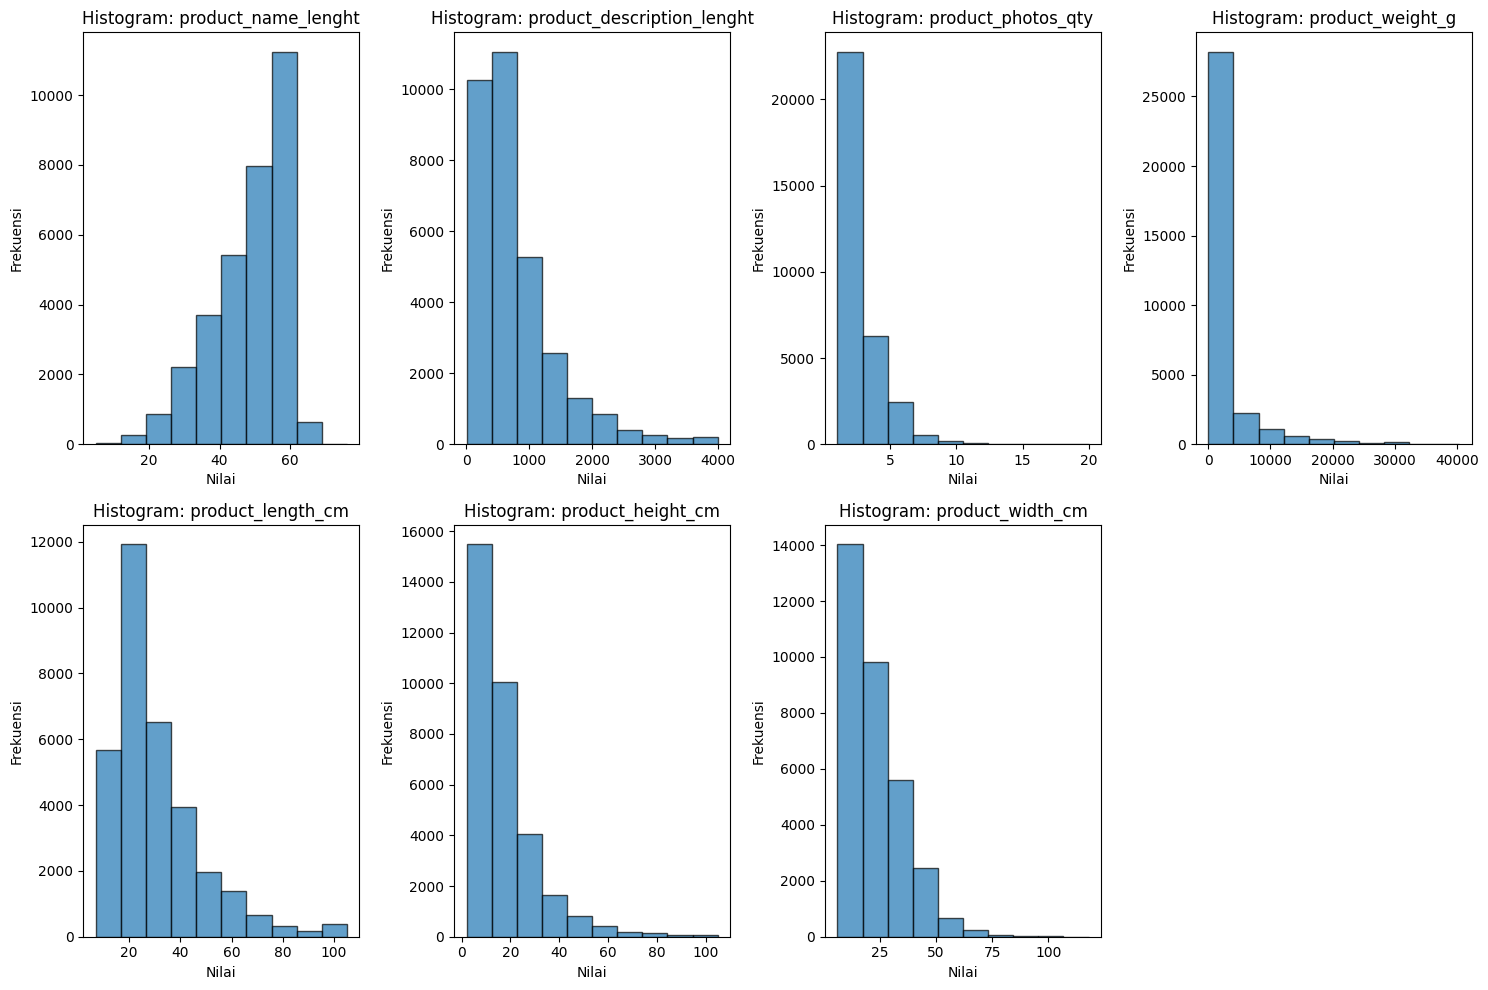

In [21]:
# Menentukan kolom numerik pada products_df
numerical_columns = products_df.select_dtypes(include=['number']).columns

# Mengatur ukuran grid subplot (4 kolom, dan baris disesuaikan otomatis)
n_cols = 4
n_rows = -(-len(numerical_columns) // n_cols)  # Menggunakan ceiling division

# Membuat subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Loop untuk membuat histogram di setiap subplot
for i, col in enumerate(numerical_columns):
    ax = axes[i // n_cols, i % n_cols]  # Menentukan posisi subplot
    ax.hist(products_df[col].dropna(), bins=10, edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram: {col}')
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')

# Menghapus subplot kosong jika ada
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


Berdasarkan analisis melalui histogram pada semua kolom numerik di dataset `products_df`, terlihat bahwa sebagian besar kolom mengalami **skewness** atau distribusi yang tidak simetris. Skewness ini menunjukkan bahwa data memiliki kecenderungan untuk condong ke salah satu sisi, baik ke arah kiri (negatively skewed) maupun ke arah kanan (positively skewed). Kondisi ini membuat penggunaan nilai mean sebagai metode imputasi missing value menjadi kurang optimal, karena mean rentan terhadap outlier yang dapat memengaruhi hasil imputasi.

Sebagai langkah penanganan, missing value pada kolom numerik di products_df akan diimputasi menggunakan nilai **median**. Metode ini dipilih karena median lebih robust terhadap outlier dan memberikan representasi yang lebih akurat untuk distribusi data yang skewed. Dengan melakukan imputasi menggunakan median, diharapkan data yang dihasilkan lebih konsisten dan tidak bias, sehingga mendukung proses analisis selanjutnya dengan lebih andal. Langkah ini juga bertujuan untuk menjaga kualitas data serta meningkatkan validitas dan keandalan hasil analisis.

In [22]:
# Mengisi missing value dengan median untuk setiap kolom numerik
for col in numerical_columns:
    median_value = products_df[col].median()
    products_df[col] = products_df[col].fillna(median_value)

print(f"Jumlah Missing Value:")
print(products_df.isna().sum(),"\n")

Jumlah Missing Value:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64 



Missing value pada kolom numerik seperti **product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm,** dan **product_width_cm** telah berhasil diatasi dengan mengganti nilai yang hilang menggunakan nilai median dari masing-masing kolom tersebut. Pendekatan ini dipilih karena distribusi data pada kolom-kolom tersebut menunjukkan adanya skewness, sehingga penggunaan median lebih tepat dibandingkan mean untuk menghindari distorsi akibat outlier. 

##### **C. Mengatasi Missing Value Pada order_df**

In [23]:
# Menampilkan data dengan missing value di kolom manapun
order_df_missing_any = order_df[order_df.isna().any(axis=1)]
order_df_missing_any.head()

order_id                       customer_id  \
6    136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44   ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103  0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128  15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154  6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   

    order_status order_purchase_timestamp   order_approved_at  \
6       invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
44       shipped      2018-06-04 16:44:48 2018-06-05 04:31:18   
103     invoiced      2018-08-03 17:44:42 2018-08-07 06:15:14   
128   processing      2017-09-03 14:22:03 2017-09-03 14:30:09   
154      shipped      2018-01-10 11:33:07 2018-01-11 02:32:30   

    order_delivered_carrier_date order_delivered_customer_date  \
6                            NaT                           NaT   
44           2018-06-05 14:32:00                           NaT   
103                          NaT                           NaT   
128                          NaT                           NaT   
154          2018-01-11 19:39:23                           NaT   

    order_estimated_delivery_date  
6                      2017-05-09  
44                     2018-06-28  
103                    2018-08-21  
128                    2017-10-03  
154                    2018-02-07

In [24]:
# Mengisi missing value pada 'order_approved_at' dengan nilai 'order_purchase_timestamp' jika tersedia
order_df['order_approved_at'] = order_df['order_approved_at'].fillna(order_df['order_purchase_timestamp'])

# Mengisi missing value pada 'order_delivered_carrier_date' dengan nilai 'order_approved_at' jika tersedia
order_df['order_delivered_carrier_date'] = order_df['order_delivered_carrier_date'].fillna(order_df['order_approved_at'])

# Mengisi missing value pada 'order_delivered_customer_date' dengan nilai 'order_delivered_carrier_date' jika tersedia
order_df['order_delivered_customer_date'] = order_df['order_delivered_customer_date'].fillna(order_df['order_delivered_carrier_date'])

print(f"Jumlah Missing Value:")
print(order_df.isna().sum(),"\n")

Jumlah Missing Value:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64 



Imputasi missing value pada kolom **order_approved_at, order_delivered_carrier_date,** dan **order_delivered_customer_date** dilakukan dengan pendekatan berbasis waktu yang **mengabaikan status pesanan**. Untuk order_approved_at, missing value diisi dengan nilai order_purchase_timestamp jika tersedia, karena pengesahan pesanan biasanya terjadi segera setelah pembelian. Selanjutnya, missing value pada order_delivered_carrier_date diisi dengan nilai order_approved_at, mengasumsikan bahwa pengiriman oleh kurir terjadi setelah pesanan disetujui. Begitu juga dengan order_delivered_customer_date, yang diisi dengan nilai order_delivered_carrier_date, karena pengiriman kepada pelanggan biasanya terjadi setelah barang diterima oleh kurir. Pendekatan ini memastikan bahwa data yang hilang dapat diisi dengan informasi yang relevan dan logis berdasarkan urutan kejadian yang wajar tanpa mempertimbangkan status pesanan, yang dapat bervariasi dan tidak selalu mencerminkan waktu yang tepat untuk imputasi.

#### **3.3.3 Mengatasi Data Duplikasi**

In [25]:
# Menampilkan semua baris yang memiliki duplikasi berdasarkan semua kolom
duplicated_rows = geolocation_df[geolocation_df.duplicated()]
duplicated_rows

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                              1046       -23.546081       -46.644820   
44                              1046       -23.546081       -46.644820   
65                              1046       -23.546081       -46.644820   
66                              1009       -23.546935       -46.636588   
67                              1046       -23.546081       -46.644820   
...                              ...              ...              ...   
1000153                        99970       -28.343273       -51.873734   
1000154                        99950       -28.070493       -52.011342   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
15             sao paulo                SP  
44             sao paulo                SP  
65             sao paulo                SP  
66             sao paulo                SP  
67             sao paulo                SP  
...                  ...               ...  
1000153          ciriaco                RS  
1000154         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000162         tapejara                RS  

[261831 rows x 5 columns]

In [26]:
# Menghapus baris duplikat
geolocation_df.drop_duplicates(inplace=True)

print(f"Jumlah Data Duplikasi: {geolocation_df.duplicated().sum()}")

Jumlah Data Duplikasi: 0


Data duplikasi pada `geolocation_df` telah berhasil dihapus untuk memastikan kualitas dan konsistensi data dalam proses analisis. Penghapusan dilakukan dengan mempertahankan hanya entri pertama dari setiap duplikasi menggunakan metode `drop_duplicates()`.

#### **3.3.4 Mengatasi Data Tidak Akurat**

##### **A. Mengatasi Data Tidak Akurat Pada orderitem_df**

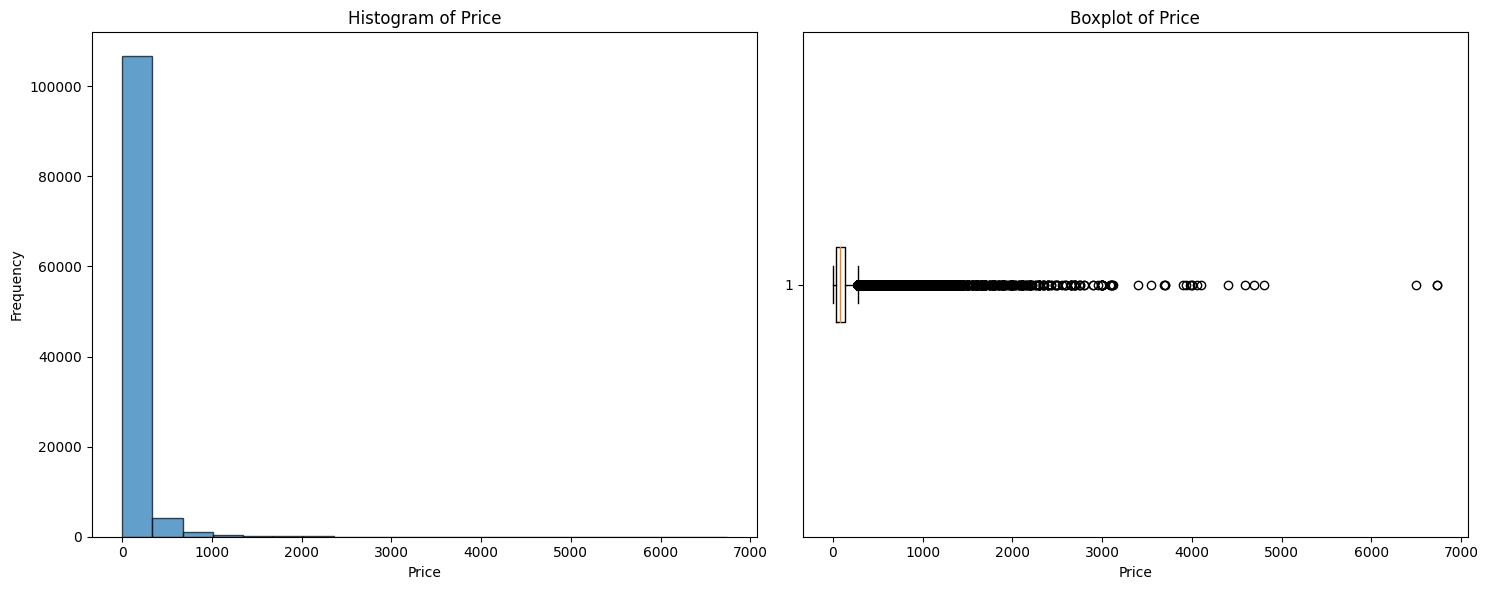

In [27]:
# Membuat figure dan subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Membuat histogram di subplot pertama
axes[0].hist(orderitem_df['price'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Membuat boxplot di subplot kedua
axes[1].boxplot(orderitem_df['price'], vert=False)
axes[1].set_title('Boxplot of Price')
axes[1].set_xlabel('Price')

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

Pada histogram untuk kolom **price**, terlihat bahwa sebagian besar nilai terkonsentrasi di bin pertama, yaitu pada angka 0 atau di sisi kiri, dengan distribusi data yang menunjukkan skewness. Hal yang sama juga dapat diamati pada boxplot, di mana titik-titik outlier tersebar cukup merata, namun terletak lebih jauh dari kotak (IQR). Hal ini menunjukkan adanya **variasi yang signifikan** pada harga produk, dengan beberapa nilai harga yang jauh lebih tinggi dibandingkan dengan mayoritas data. Pada kolom price, ditemukan beberapa nilai yang jauh lebih tinggi dibandingkan dengan mayoritas data lainnya, yang dapat dianggap sebagai outlier. Namun, outlier atau harga yang sangat tinggi tersebut mencerminkan **produk-produk premium** atau barang-barang dengan kualitas luar biasa yang memang memiliki harga jauh di atas rata-rata pasar. Produk dengan harga tinggi ini bisa mencakup barang-barang mewah, edisi terbatas, atau barang dengan fitur unik yang membedakannya dari produk lain. Dengan demikian, harga yang sangat tinggi bukanlah kesalahan data, melainkan representasi valid dari segmen pasar yang berbeda. Oleh karena itu, **mempertahankan outlier** dalam kolom price memungkinkan untuk menjaga keberagaman produk dalam analisis dan memastikan bahwa data harga tetap mencerminkan kenyataan pasar yang lebih luas, termasuk produk dengan nilai premium. Menghapus outlier ini dapat mengabaikan informasi berharga yang berkontribusi pada pemahaman lebih dalam tentang pola harga di pasar, serta mempengaruhi keputusan terkait strategi penetapan harga dan segmentasi pelanggan untuk produk-produk high-end. 

In [28]:
# Menampilkan baris-baris di mana nilai freight_value = 0
zero_freight_value_df = orderitem_df[orderitem_df['freight_value'] == 0]
zero_freight_value_df

order_id  order_item_id  \
114     00404fa7a687c8c44ca69d42695aae73              1   
258     00a870c6c06346e85335524935c600c0              1   
483     011c899816ea29773525bd3322dbb6aa              1   
508     012b3f6ab7776a8ab3443a4ad7bef2e6              1   
509     012b3f6ab7776a8ab3443a4ad7bef2e6              2   
...                                  ...            ...   
111094  fc698f330ec7fb74859071cc6cb29772              1   
111497  fd4907109f6bac23f07064af84bec02d              1   
111649  fd95e4b85ebbb81853d4a6be3d61432b              1   
112182  fee19a0dc7358b6962a611cecf6a37b4              1   
112607  ffe73fc1d73e03fdb50e63903ddfe882              1   

                              product_id                         seller_id  \
114     53b36df67ebb7c41585e8d54d6772e08  7d13fca15225358621be4086e1eb0964   
258     aca2eb7d00ea1a7b8ebd4e68314663af  955fee9216a65b617aa5c0531780ce60   
483     53b36df67ebb7c41585e8d54d6772e08  7d13fca15225358621be4086e1eb0964   
508     422879e10f46682990de24d770e7f83d  1f50f920176fa81dab994f9023523100   
509     422879e10f46682990de24d770e7f83d  1f50f920176fa81dab994f9023523100   
...                                  ...                               ...   
111094  422879e10f46682990de24d770e7f83d  1f50f920176fa81dab994f9023523100   
111497  7a10781637204d8d10485c71a6108a2e  4869f7a5dfa277a7dca6462dcf3b52b2   
111649  53b36df67ebb7c41585e8d54d6772e08  4869f7a5dfa277a7dca6462dcf3b52b2   
112182  f1c7f353075ce59d8a6f3cf58f419c9c  37be5a7c751166fbc5f8ccba4119e043   
112607  53b36df67ebb7c41585e8d54d6772e08  4869f7a5dfa277a7dca6462dcf3b52b2   

       shipping_limit_date  price  freight_value  
114    2018-05-15 04:31:26   99.9            0.0  
258    2018-05-14 00:14:29   69.9            0.0  
483    2018-05-07 05:30:45   99.9            0.0  
508    2018-05-09 21:30:50   53.9            0.0  
509    2018-05-09 21:30:50   53.9            0.0  
...                    ...    ...            ...  
111094 2018-04-25 02:31:57   53.9            0.0  
111497 2018-04-30 11:31:32  219.0            0.0  
111649 2018-05-04 11:10:31  106.9            0.0  
112182 2017-09-07 22:06:31  195.0            0.0  
112607 2018-04-23 13:15:15  112.9            0.0  

[383 rows x 7 columns]

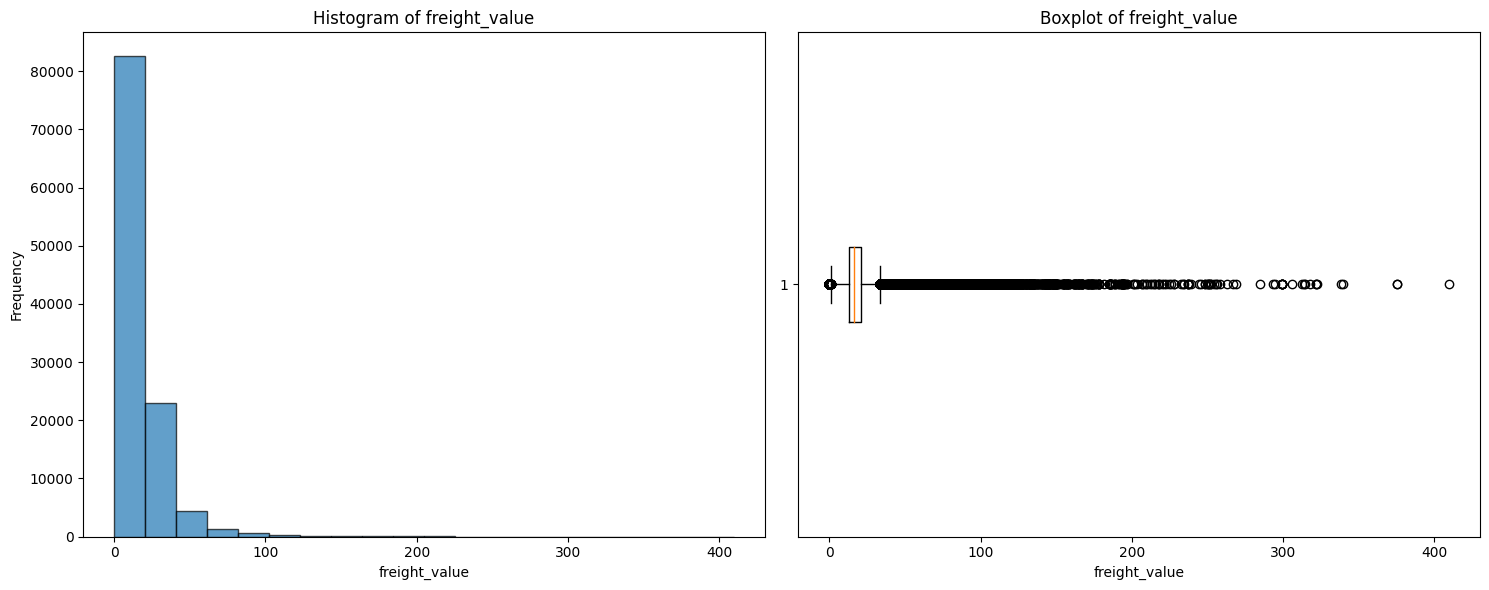

In [29]:
# Membuat figure dan subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Membuat histogram di subplot pertama
axes[0].hist(orderitem_df['freight_value'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of freight_value')
axes[0].set_xlabel('freight_value')
axes[0].set_ylabel('Frequency')

# Membuat boxplot di subplot kedua
axes[1].boxplot(orderitem_df['freight_value'], vert=False)
axes[1].set_title('Boxplot of freight_value')
axes[1].set_xlabel('freight_value')

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

Pada histogram untuk kolom **freight_value**, terlihat bahwa sebagian besar nilai terkonsentrasi di bin pertama, yaitu pada angka 0 atau di sisi kiri, dengan distribusi data yang menunjukkan skewness ke arah kanan. Hal ini mengindikasikan bahwa mayoritas nilai freight_value relatif kecil, sementara terdapat beberapa nilai yang jauh lebih besar. Sementara itu, pada boxplot, terdapat sejumlah titik outlier, termasuk nilai 0 yang muncul sebagai anomali dalam distribusi. Selain itu, beberapa titik outlier lainnya tersebar cukup merata dan terletak jauh dari kotak interkuartil (IQR), menunjukkan adanya variasi signifikan dalam biaya pengiriman. Keberadaan outlier ini dapat mencerminkan perbedaan biaya pengiriman berdasarkan jarak, metode pengiriman, atau faktor lainnya. Nilai 0 pada freight_value dapat mencerminkan kebijakan promosi seperti program **gratis ongkir** yang ditawarkan oleh penjual atau platform e-commerce. Hal ini cukup umum terjadi dalam kampanye diskon tertentu atau sebagai insentif bagi pelanggan. Oleh karena itu, mempertahankan nilai outlier ini tetap relevan karena dapat memberikan wawasan mengenai strategi pemasaran yang diterapkan oleh platform atau penjual dalam meningkatkan volume transaksi dan kepuasan pelanggan.

##### **B. Mengatasi Data Tidak Akurat Pada payments_df**

In [30]:
# Menampilkan baris-baris di mana nilai payment_installments = 0
zero_payment_installments_df = payments_df[payments_df['payment_installments'] == 0]
zero_payment_installments_df

order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     0          58.69  
79014                     0         129.94

Nilai **0** pada **payment_installments** perlu diganti menjadi **1** agar tetap valid dan logis dalam konteks pembayaran. Dalam sistem pembayaran, jumlah cicilan minimal adalah satu kali pembayaran penuh, sehingga nilai 0 tidak masuk akal karena tidak mencerminkan transaksi yang sebenarnya. Selain itu, jika nilai 0 menunjukkan bahwa pelanggan membayar lunas tanpa cicilan, maka lebih tepat untuk merepresentasikannya dengan 1, sehingga tetap konsisten dengan transaksi lainnya. Oleh karena itu, untuk memastikan keakuratan data dan menghindari kesalahan dalam analisis, semua nilai 0 pada payment_installments akan diganti dengan 1.

In [31]:
# Mengganti nilai 0 pada payment_installments dengan nilai 1
payments_df['payment_installments'] = payments_df['payment_installments'].replace(0, 1)

# Memeriksa apakah sudah tidak ada nilai 0 pada kolom payment_installments
print(f"Jumlah baris data dengan nilai 0 pada payment_installments: {len(payments_df[payments_df['payment_installments'] == 0])}")

zero_payment_installments_df = payments_df.loc[[46982, 79014]]
zero_payment_installments_df

Jumlah baris data dengan nilai 0 pada payment_installments: 0


order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     1          58.69  
79014                     1         129.94

In [32]:
# Menampilkan baris-baris di mana nilai payment_value = 0
zero_payment_value_df = payments_df[payments_df['payment_value'] == 0]
zero_payment_value_df

order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
51280                      1            0.0  
57411                      1            0.0  
62674                      1            0.0  
77885                      1            0.0  
94427                      1            0.0  
100766                     1            0.0

In [33]:
print(f"Jumlah masing-masing kategori pembayaran:\n{payments_df['payment_type'].value_counts()}")

Jumlah masing-masing kategori pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


Nilai **0** pada **payment_value** dianggap valid karena semua entri dengan nilai nol menggunakan metode pembayaran **voucher** atau **not_defined**. Dalam kasus metode voucher, transaksi ini kemungkinan besar menggunakan diskon penuh, sehingga pelanggan tidak perlu membayar. Hal ini umum terjadi dalam program promosi atau cashback yang menutupi seluruh biaya pembelian. Sementara itu, metode not_defined hanya muncul pada 3 entri, yang jumlahnya sangat kecil dibandingkan total data. Untuk memastikan konsistensi dan menghindari ambiguitas dalam analisis, metode pembayaran untuk entri not_defined akan diganti menjadi voucher. Dengan demikian, semua transaksi dengan payment_value = 0 akan memiliki justifikasi yang jelas sebagai pembayaran yang ditutupi oleh voucher.

In [34]:
# Mengganti 'not_defined' menjadi 'voucher' pada kolom payment_type
payments_df['payment_type'] = payments_df['payment_type'].replace('not_defined', 'voucher')

print(f"Jumlah masing-masing kategori pembayaran:\n{payments_df['payment_type'].value_counts()}")

Jumlah masing-masing kategori pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5778
debit_card      1529
Name: count, dtype: int64


##### **C. Mengatasi Data Tidak Akurat Pada product_df**

In [35]:
# Menampilkan baris-baris di mana nilai product_weight_g = 0
zero_product_weight_g_df = products_df[products_df['product_weight_g'] == 0]
zero_product_weight_g_df

product_id product_category_name  \
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
9769                  51.0                       529.0                 1.0   
13683                 48.0                       528.0                 1.0   
14997                 53.0                       528.0                 1.0   
32079                 53.0                       528.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
9769                0.0               30.0               25.0   
13683               0.0               30.0               25.0   
14997               0.0               30.0               25.0   
32079               0.0               30.0               25.0   

       product_width_cm  
9769               30.0  
13683              30.0  
14997              30.0  
32079              30.0

Nilai **0** pada kolom **product_weight_g** dianggap tidak valid karena setiap produk fisik pasti memiliki berat. Keberadaan nilai 0 gram kemungkinan besar merupakan kesalahan pencatatan atau data yang tidak lengkap. Untuk mengatasi masalah ini, nilai 0 akan diganti dengan nilai **median** dari berat produk dalam kategori yang sama (product_category_name). Pendekatan ini dilakukan karena median lebih tahan terhadap outlier dibandingkan mean, sehingga dapat memberikan estimasi yang lebih representatif terhadap berat sebenarnya dari produk dalam kategori yang sama. 

In [36]:
# Mengganti nilai 0 pada product_weight_g dengan median berdasarkan kategori produk
products_df.loc[products_df['product_weight_g'] == 0, 'product_weight_g'] = products_df.groupby('product_category_name')['product_weight_g'].transform(lambda x: x.replace(0, x.median()))

zero_product_weight_g_df = products_df.loc[[9769, 13683, 14997, 32079]]
zero_product_weight_g_df

product_id product_category_name  \
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
9769                  51.0                       529.0                 1.0   
13683                 48.0                       528.0                 1.0   
14997                 53.0                       528.0                 1.0   
32079                 53.0                       528.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
9769             1250.0               30.0               25.0   
13683            1250.0               30.0               25.0   
14997            1250.0               30.0               25.0   
32079            1250.0               30.0               25.0   

       product_width_cm  
9769               30.0  
13683              30.0  
14997              30.0  
32079              30.0

## **4. Exploratory Data Analysis (EDA)**

In [37]:
# Merging Dataframes
all_df = order_df.merge(customers_df, on='customer_id', how='inner')
all_df = all_df.merge(orderitem_df, on='order_id', how='left')
all_df = all_df.merge(payments_df, on='order_id', how='left', validate='m:m')
all_df = all_df.merge(reviews_df, on='order_id', how='left')
all_df = all_df.merge(products_df, on='product_id', how='left')
all_df = all_df.merge(productcategory_df, on='product_category_name', how='left')
all_df = all_df.merge(sellers_df, on='seller_id', how='left')
all_df

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
119138  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
119139  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
119140  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119141  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119142  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
...             ...                      ...                 ...   
119138    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
119139    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
119140    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
119141    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
119142    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
119138          2018-02-07 23:22:42           2018-02-28 17:37:56   
119139          2017-08-28 20:52:26           2017-09-21 11:24:17   
119140          2018-01-12 15:35:03           2018-01-25 23:32:54   
119141          2018-01-12 15:35:03           2018-01-25 23:32:54   
119142          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                         2018-08-13  af07308b275d755c9edb36a90c618231   
4                         2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
...                              ...                               ...   
119138                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
119139                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
119140                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
119141                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
119142                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix  ... product_description_lenght  \
0                           3149  ...                      268.0   
1                           3149  ...                      268.0   
2                           3149  ...                      268.0   
3                          47813  ...                      178.0   
4                          75265  ...                      232.0   
...                          ...  ...                        ...   
119138                     11722  ...                      828.0   
119139          

In [38]:
print(f"Daftar kolom pada all_df:\n{all_df.columns}")

Daftar kolom pada all_df:
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')


### **4.1 Eksplorasi dan Analisis Customer**

In [39]:
# Menghitung jumlah pelanggan unik
jumlah_pelanggan_unik = all_df['customer_unique_id'].nunique()
print(f"Jumlah pelanggan: {jumlah_pelanggan_unik}\n")

Jumlah pelanggan: 96096



Jumlah pelanggan yang terdaftar sebanyak **96,096** mencerminkan total pelanggan unik yang ada dalam dataset. Angka ini mengindikasikan jumlah individu yang telah melakukan pembelian atau terdaftar di platform selama periode data yang dianalisis. 

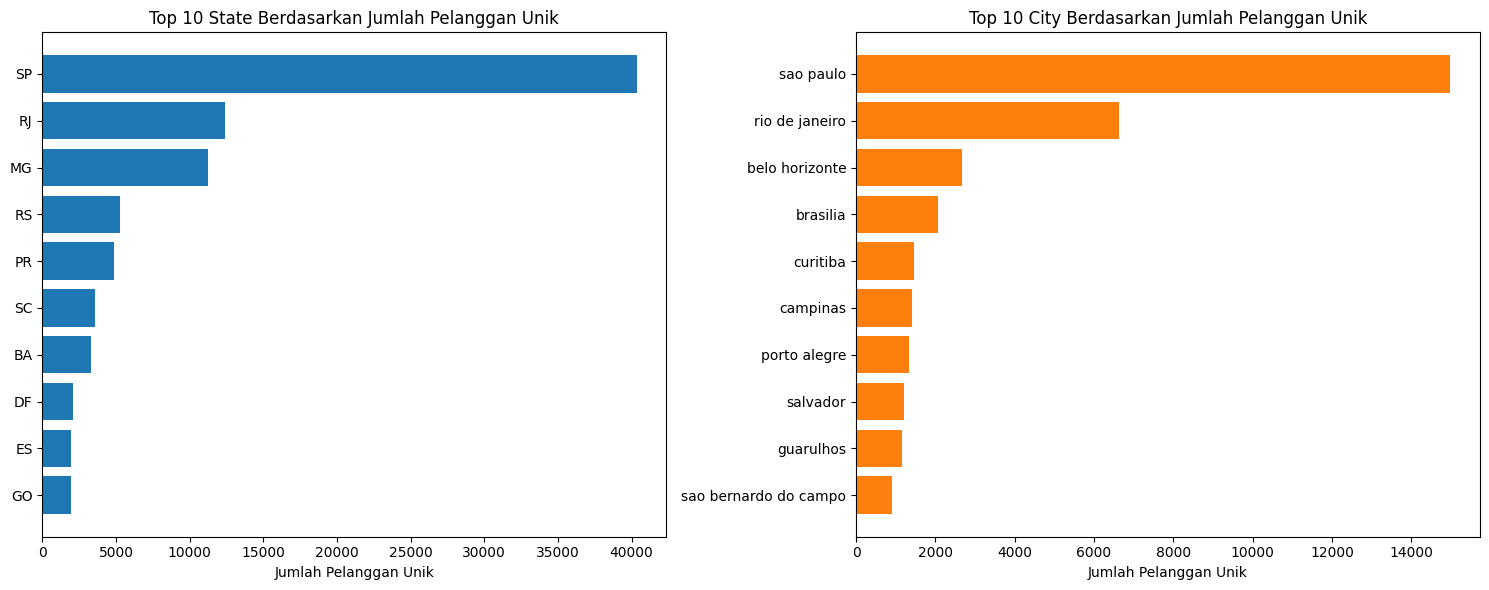

In [40]:
# Hitung jumlah pelanggan unik per kota dan negara bagian
customer_location = all_df.groupby(['customer_state', 'customer_city'])['customer_unique_id'].nunique().reset_index()

# Sort berdasarkan jumlah pelanggan unik
customer_location = customer_location.sort_values(by='customer_unique_id', ascending=False)

# Ambil top 10 state dan top 10 city
top_states = customer_location.groupby('customer_state')['customer_unique_id'].sum().sort_values(ascending=False).head(10)
top_cities = customer_location.groupby('customer_city')['customer_unique_id'].sum().sort_values(ascending=False).head(10)

# Membuat figure dan subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart top 10 state
axes[0].barh(top_states.index, top_states.values, color='tab:blue')
axes[0].set_title('Top 10 State Berdasarkan Jumlah Pelanggan Unik')
axes[0].set_xlabel('Jumlah Pelanggan Unik')
axes[0].invert_yaxis()

# Bar chart top 10 city
axes[1].barh(top_cities.index, top_cities.values, color='tab:orange')
axes[1].set_title('Top 10 City Berdasarkan Jumlah Pelanggan Unik')
axes[1].set_xlabel('Jumlah Pelanggan Unik')
axes[1].invert_yaxis()

# Menampilkan plot
plt.tight_layout()
plt.show()

In [41]:
print("Top 10 States berdasarkan jumlah pelanggan unik:")
print(top_states)

print("\nTop 10 Cities berdasarkan jumlah pelanggan unik:")
print(top_cities)

Top 10 States berdasarkan jumlah pelanggan unik:
customer_state
SP    40345
RJ    12396
MG    11269
RS     5280
PR     4887
SC     3536
BA     3279
DF     2076
ES     1965
GO     1953
Name: customer_unique_id, dtype: int64

Top 10 Cities berdasarkan jumlah pelanggan unik:
customer_city
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908
Name: customer_unique_id, dtype: int64


Berdasarkan data yang dianalisis, **Top 10 States** dengan jumlah pelanggan unik terbanyak menunjukkan bahwa **São Paulo (SP)** memimpin dengan 40,345 pelanggan unik, yang jauh lebih tinggi dibandingkan dengan negara bagian lainnya. Ini menunjukkan bahwa São Paulo adalah pusat kegiatan e-commerce di Brasil, mungkin karena populasinya yang besar dan peran ekonominya yang signifikan. Diikuti oleh **Rio de Janeiro (RJ)** dengan 12,396 pelanggan unik, dan **Minas Gerais (MG)** dengan 11,269 pelanggan. Negara bagian lain yang juga masuk dalam daftar adalah **Rio Grande do Sul (RS)**, **Paraná (PR)**, dan **Santa Catarina (SC)**, yang masing-masing memiliki jumlah pelanggan unik yang lebih kecil, tetapi tetap signifikan dalam kontribusinya terhadap total pelanggan di Brasil.

Sementara itu, untuk **Top 10 Cities**, **São Paulo** tetap menjadi kota dengan jumlah pelanggan unik terbanyak, mencapai 14,984 pelanggan unik. Kota besar lainnya seperti **Rio de Janeiro** dan **Belo Horizonte** juga menunjukkan angka yang signifikan dengan masing-masing 6,620 dan 2,672 pelanggan unik. Kota-kota lain seperti **Brasília**, **Curitiba**, dan **Campinas** turut berperan dalam pasar e-commerce, meskipun jumlah pelanggan uniknya relatif lebih rendah dibandingkan dengan São Paulo dan Rio de Janeiro. Hal ini mengindikasikan bahwa meskipun e-commerce berkembang di banyak wilayah Brasil, konsentrasi terbesar tetap ada di kota-kota besar yang memiliki akses infrastruktur dan ekonomi yang lebih baik.

Secara keseluruhan, distribusi pelanggan menunjukkan konsentrasi yang tinggi di negara bagian dan kota besar, dengan São Paulo sebagai pusat utama e-commerce di Brasil, diikuti oleh kota-kota besar lainnya yang turut memberikan kontribusi signifikan terhadap total pelanggan.

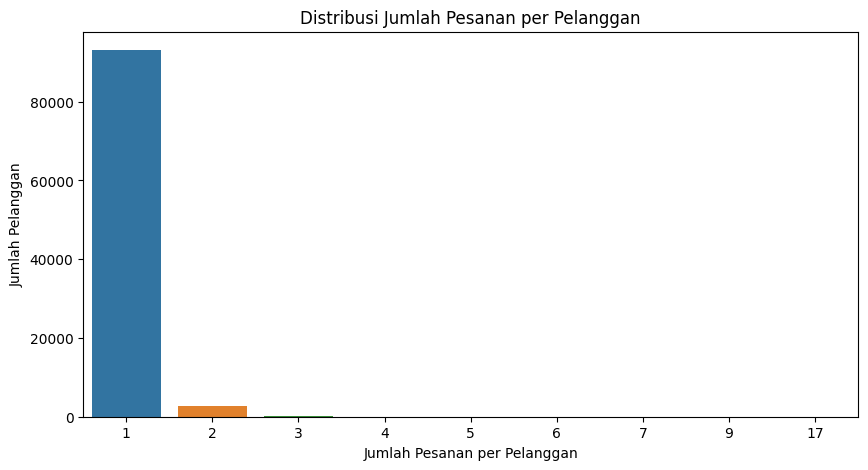

Top 10 Pelanggan dengan Pesanan Terbanyak:
                     customer_unique_id  num_orders
52973  8d50f5eadf50201ccdcedfb9e2ac8455          17
23472  3e43e6105506432c953e165fb2acf44c           9
37797  6469f99c1f9dfae7733b25662e7f1782           7
76082  ca77025e7201e3b30c44b472ff346268           7
10354  1b6c7548a2a1f9037c1fd3ddfed95f33           7
7175   12f5d6e1cbf93dafd9dcc19095df0b3d           6
83540  de34b16117594161a6a89c50b289d35a           6
37585  63cfc61cee11cbe306bff5857d00bfe4           6
90451  f0e310a6839dce9de1638e0fe5ab282a           6
27043  47c1a3033b8b77b3ab6e109eb4d5fdf3           6


In [42]:
# Hitung jumlah pesanan per pelanggan berdasarkan 'customer_unique_id'
customer_orders = all_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_orders = customer_orders.rename(columns={'order_id': 'num_orders'})

# Hitung distribusi jumlah pesanan per pelanggan
order_counts = customer_orders['num_orders'].value_counts().sort_index()

# Plot distribusi jumlah pesanan per pelanggan dengan barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=order_counts.index, y=order_counts.values)
plt.xlabel('Jumlah Pesanan per Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Jumlah Pesanan per Pelanggan')
plt.xticks(rotation=0)
plt.show()

# Identifikasi pelanggan dengan jumlah pesanan terbanyak (Top 10)
top_customers = customer_orders.sort_values(by='num_orders', ascending=False).head(10)

# Cetak hasil Top 10 pelanggan dengan pesanan terbanyak
print("Top 10 Pelanggan dengan Pesanan Terbanyak:")
print(top_customers)

Berdasarkan barplot distribusi jumlah pesanan per pelanggan, mayoritas pelanggan hanya melakukan satu kali pemesanan. Hal ini menunjukkan bahwa sebagian besar pelanggan dalam dataset ini adalah pembeli satu kali (one-time buyers), dengan perbedaan jumlah yang signifikan dibandingkan pelanggan yang melakukan lebih dari satu pesanan.  

Selain itu, dari daftar **Top 10 pelanggan dengan pesanan terbanyak**, pelanggan dengan **customer_unique_id** `8d50f5eadf50201ccdcedfb9e2ac8455` merupakan pelanggan dengan jumlah pesanan terbanyak, yaitu **17 pesanan**. Sementara pelanggan lainnya memiliki jumlah pesanan yang jauh lebih rendah, berkisar antara **6 hingga 9 pesanan**. Perbedaan jumlah pesanan antara pelanggan teratas dan mayoritas pelanggan menunjukkan bahwa hanya sedikit pelanggan yang melakukan banyak transaksi, sedangkan sebagian besar pelanggan hanya melakukan satu kali pembelian. Hal ini dapat menjadi indikasi bahwa loyalitas pelanggan masih rendah atau banyak pelanggan yang hanya mencoba layanan tanpa melakukan pembelian ulang.

### **4.2 Eksplorasi dan Analisis Seller**

In [43]:
# Menghitung jumlah penjual unik
jumlah_penjual_unik = all_df['seller_id'].nunique()
print(f"Jumlah penjual: {jumlah_penjual_unik}\n")

Jumlah penjual: 3095



Dataset ini mencatat **3.095** penjual, yang menunjukkan bahwa platform e-commerce memiliki ekosistem penjual yang cukup besar dan beragam. Jumlah penjual yang tinggi dapat mengindikasikan adanya persaingan yang ketat di antara mereka, terutama dalam kategori produk yang populer. Selain itu, keberagaman penjual juga dapat memberikan pelanggan lebih banyak pilihan dalam hal harga, kualitas, dan variasi produk.

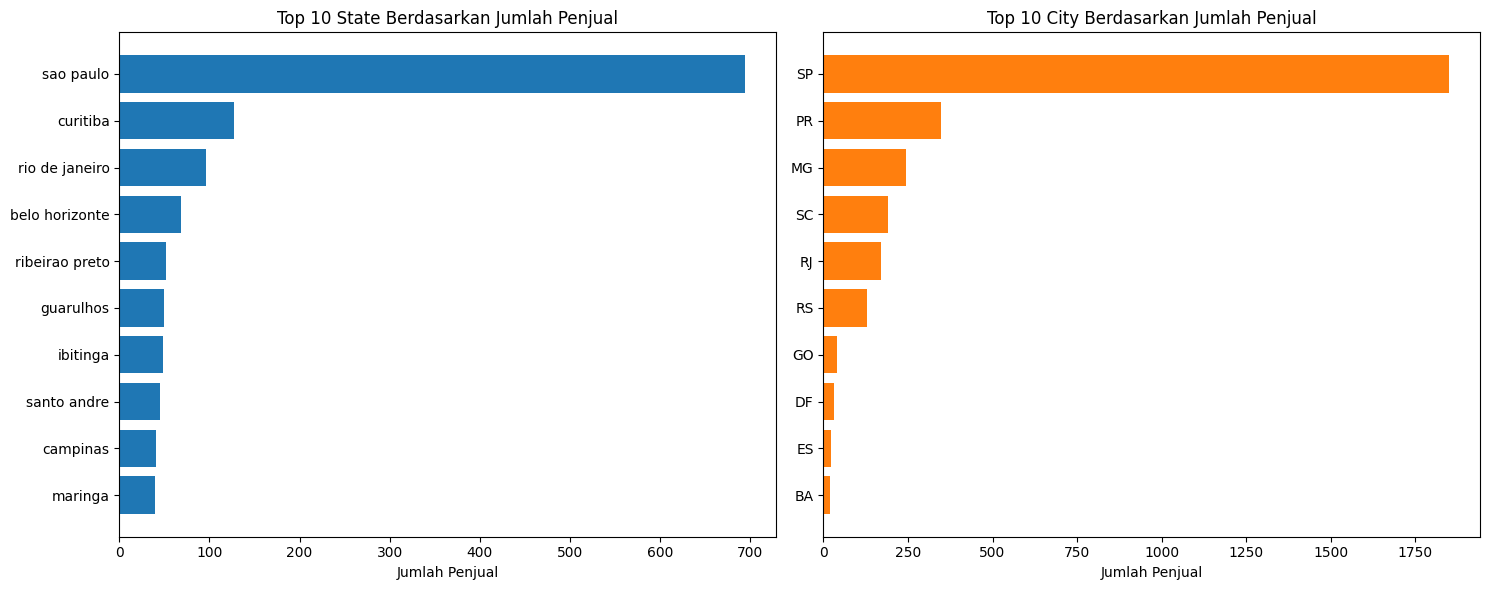

In [44]:
# Hitung jumlah pelanggan unik per kota dan negara bagian
seller_location = all_df.groupby(['seller_city', 'seller_state'])['seller_id'].nunique().reset_index()

# Sort berdasarkan jumlah pelanggan unik
seller_location = seller_location.sort_values(by='seller_id', ascending=False)

# Ambil top 10 state dan top 10 city
top_states = seller_location.groupby('seller_city')['seller_id'].sum().sort_values(ascending=False).head(10)
top_cities = seller_location.groupby('seller_state')['seller_id'].sum().sort_values(ascending=False).head(10)

# Membuat figure dan subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart top 10 state
axes[0].barh(top_states.index, top_states.values, color='tab:blue')
axes[0].set_title('Top 10 State Berdasarkan Jumlah Penjual')
axes[0].set_xlabel('Jumlah Penjual')
axes[0].invert_yaxis()

# Bar chart top 10 city
axes[1].barh(top_cities.index, top_cities.values, color='tab:orange')
axes[1].set_title('Top 10 City Berdasarkan Jumlah Penjual')
axes[1].set_xlabel('Jumlah Penjual')
axes[1].invert_yaxis()

# Menampilkan plot
plt.tight_layout()
plt.show()

In [45]:
print("Top 10 States berdasarkan jumlah penjual:")
print(top_states)

print("\nTop 10 Cities berdasarkan jumlah penjual:")
print(top_cities)

Top 10 States berdasarkan jumlah penjual:
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

Top 10 Cities berdasarkan jumlah penjual:
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64


Berdasarkan data **Top 10 States berdasarkan jumlah penjual**, negara bagian dengan jumlah penjual terbanyak adalah **São Paulo (SP)** dengan **1.849 penjual**, diikuti oleh **Paraná (PR)** dengan **349 penjual**, serta **Minas Gerais (MG)** dengan **244 penjual**. Hal ini menunjukkan bahwa sebagian besar penjual dalam platform e-commerce berasal dari São Paulo, yang kemungkinan besar disebabkan oleh faktor ekonomi, infrastruktur, dan aksesibilitas yang lebih baik dibandingkan negara bagian lainnya.  

Sementara itu, berdasarkan **Top 10 Cities berdasarkan jumlah penjual**, **São Paulo** juga menjadi kota dengan jumlah penjual terbanyak, yaitu **694 penjual**, diikuti oleh **Curitiba (127 penjual)** dan **Rio de Janeiro (96 penjual)**. Kota-kota besar seperti **Belo Horizonte, Ribeirão Preto, dan Campinas** juga memiliki jumlah penjual yang signifikan, yang menunjukkan bahwa pusat aktivitas e-commerce di Brasil masih terpusat di wilayah perkotaan utama. Dominasi São Paulo baik dalam tingkat negara bagian maupun kota mengindikasikan bahwa ekosistem penjual e-commerce lebih berkembang di wilayah ini dibandingkan daerah lain.


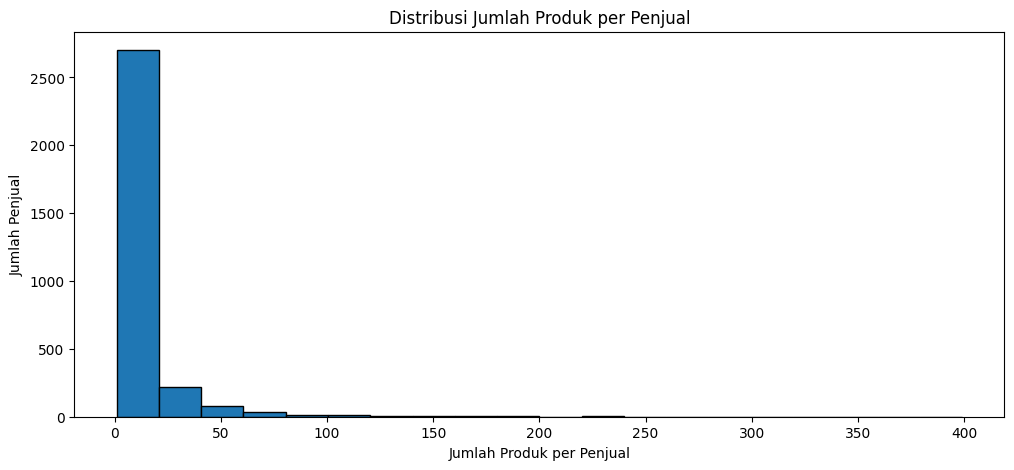

Top 10 Penjual dengan Produk Terbanyak:
                             seller_id  num_products
881   4a3ca9315b744ce9f8e9374361493884           399
2485  cca3071e3e9bb7d12640c9fbe2301306           322
2617  d91fb3b7d041e83b64a00a3edfb37e4f           315
3024  fa1c13f2614d7b5c4749cbc52fecda94           289
1391  7142540dd4c91e2237acb7e911c4eba2           266
1235  6560211a19b47992c3666cc44a7e94c0           256
2643  da8622b14eb17ae2831f4ac5b9dab84a           222
2836  ea8482cd71df3c1969d7b9473ff13abc           220
731   3d871de0142ce09b7081e2b9d1733cb1           202
1535  7c67e1448b00f6e969d365cea6b010ab           198


In [46]:
# Hitung jumlah produk unik per penjual
seller_products = all_df.groupby('seller_id')['product_id'].nunique().reset_index()
seller_products = seller_products.rename(columns={'product_id': 'num_products'})

# Plot distribusi jumlah produk per penjual
plt.figure(figsize=(12, 5))
plt.hist(seller_products['num_products'], bins=20, edgecolor='black')
plt.xlabel('Jumlah Produk per Penjual')
plt.ylabel('Jumlah Penjual')
plt.title('Distribusi Jumlah Produk per Penjual')
plt.show()

# Identifikasi penjual dengan jumlah produk terbanyak (Top 10)
top_sellers = seller_products.sort_values(by='num_products', ascending=False).head(10)

# Cetak hasil Top 10 penjual dengan produk terbanyak
print("Top 10 Penjual dengan Produk Terbanyak:")
print(top_sellers)

Berdasarkan histogram distribusi jumlah produk per penjual, terlihat bahwa mayoritas penjual memiliki **≤20 produk**, dengan perbedaan yang sangat signifikan pada bin pertama. Distribusi ini menunjukkan **skewness yang kuat ke kanan**, yang berarti hanya sedikit penjual yang memiliki banyak produk, sementara sebagian besar penjual memiliki jumlah produk yang relatif kecil.  

Selain itu, daftar **Top 10 penjual dengan produk terbanyak** menunjukkan bahwa penjual dengan **seller_id** `4a3ca9315b744ce9f8e9374361493884` memiliki jumlah produk terbanyak, yaitu **399 produk**. Sementara itu, penjual lain dalam daftar ini memiliki jumlah produk yang bervariasi antara **198 hingga 322 produk**. Perbedaan ini mengindikasikan bahwa hanya segelintir penjual yang menawarkan banyak produk, sementara sebagian besar penjual memiliki portofolio produk yang jauh lebih kecil. Hal ini bisa mencerminkan adanya **dominasi beberapa penjual besar** dalam ekosistem e-commerce, sementara mayoritas penjual beroperasi dengan skala yang lebih terbatas.

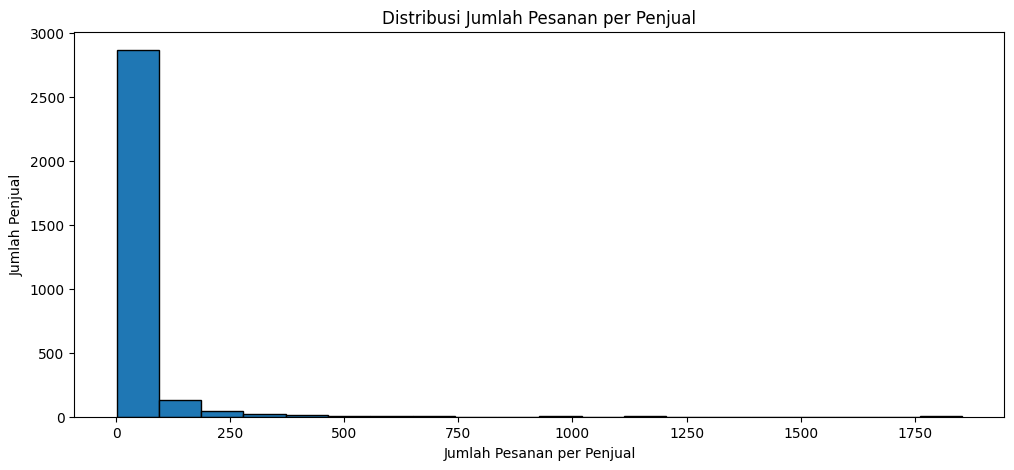

Top 10 Penjual berdasarkan Jumlah Pesanan:
                             seller_id  num_orders
1235  6560211a19b47992c3666cc44a7e94c0        1854
881   4a3ca9315b744ce9f8e9374361493884        1806
2481  cc419e0650a3c5ba77189a1882b7556a        1706
368   1f50f920176fa81dab994f9023523100        1404
2643  da8622b14eb17ae2831f4ac5b9dab84a        1314
1824  955fee9216a65b617aa5c0531780ce60        1287
1505  7a67c85e85bb2ce8582c35f2203ad736        1160
2836  ea8482cd71df3c1969d7b9473ff13abc        1146
857   4869f7a5dfa277a7dca6462dcf3b52b2        1132
731   3d871de0142ce09b7081e2b9d1733cb1        1080


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah pesanan per penjual
seller_orders = all_df.groupby('seller_id')['order_id'].nunique().reset_index()
seller_orders = seller_orders.rename(columns={'order_id': 'num_orders'})

# Plot distribusi jumlah pesanan per penjual
plt.figure(figsize=(12, 5))
plt.hist(seller_orders['num_orders'], bins=20, edgecolor='black')
plt.xlabel('Jumlah Pesanan per Penjual')
plt.ylabel('Jumlah Penjual')
plt.title('Distribusi Jumlah Pesanan per Penjual')
plt.show()

# Identifikasi penjual dengan jumlah pesanan terbanyak (Top 10)
top_sellers_orders = seller_orders.sort_values(by='num_orders', ascending=False).head(10)

# Cetak hasil Top 10 penjual dengan pesanan terbanyak
print("Top 10 Penjual berdasarkan Jumlah Pesanan:")
print(top_sellers_orders)

Berdasarkan histogram distribusi jumlah pesanan per penjual, terlihat bahwa mayoritas penjual menerima **≤100 pesanan**, dengan perbedaan yang sangat signifikan pada bin pertama. Distribusi ini menunjukkan **skewness yang kuat ke kanan**, yang berarti hanya sedikit penjual yang menerima jumlah pesanan yang sangat tinggi, sementara sebagian besar penjual hanya menerima sedikit pesanan.  

Daftar **Top 10 penjual berdasarkan jumlah pesanan** menunjukkan bahwa penjual dengan **seller_id** `6560211a19b47992c3666cc44a7e94c0` menerima jumlah pesanan terbanyak, yaitu **1.854 pesanan**. Penjual lainnya dalam daftar ini memiliki jumlah pesanan yang berkisar antara **1.080 hingga 1.806 pesanan**. Perbedaan ini mengindikasikan bahwa terdapat beberapa **penjual besar yang mendominasi transaksi**, sementara sebagian besar penjual beroperasi dengan jumlah pesanan yang jauh lebih kecil. Fenomena ini dapat mencerminkan struktur pasar e-commerce yang tidak merata, di mana hanya segelintir penjual yang memiliki volume penjualan yang sangat tinggi dibandingkan yang lain.


### **4.3 Eksplorasi dan Analisis Product**

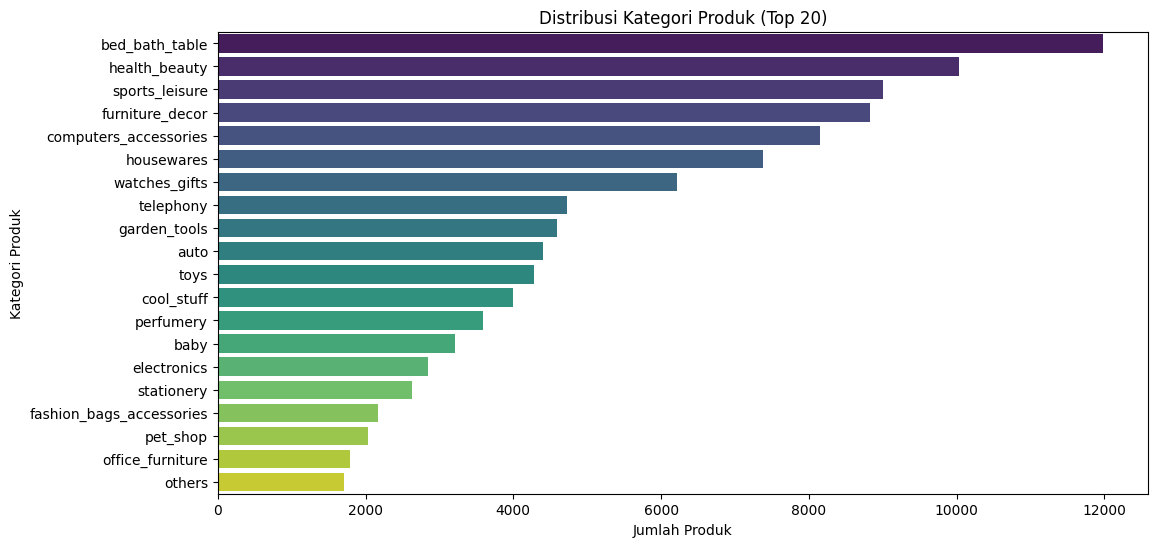

In [48]:
# Hitung jumlah produk per kategori
product_counts = all_df['product_category_name_english'].value_counts().reset_index()
product_counts.columns = ['product_category', 'num_products']

# Plot distribusi kategori produk
plt.figure(figsize=(12, 6))
sns.barplot(data=product_counts.head(20), x='num_products', y='product_category', palette='viridis')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori Produk')
plt.title('Distribusi Kategori Produk (Top 20)')
plt.show()

Berdasarkan bar plot distribusi kategori produk, terlihat bahwa kategori **"bed_bath_table"** memiliki jumlah produk terbanyak, yaitu **11.988 produk**. Kategori ini kemungkinan mencakup berbagai macam produk untuk kebutuhan rumah tangga seperti tempat tidur, perlengkapan kamar mandi, dan meja.  

Kategori **"health_beauty"** berada di posisi kedua dengan **10.032 produk**, menunjukkan tingginya variasi produk dalam sektor kesehatan dan kecantikan, seperti perawatan kulit, kosmetik, dan suplemen.  

Selanjutnya, kategori **"sports_leisure"** memiliki **9.004 produk**, yang mencerminkan tingginya permintaan akan perlengkapan olahraga dan aktivitas rekreasi. Kategori **"furniture_decor"** dengan **8.832 produk** menunjukkan bahwa produk dekorasi dan furnitur juga cukup dominan di marketplace ini.  

Kategori **"computers_accessories"** dengan **8.150 produk** menempati urutan kelima, mengindikasikan bahwa perangkat komputer dan aksesoris seperti mouse, keyboard, dan komponen lainnya memiliki jumlah produk yang signifikan.  

Secara keseluruhan, analisis ini menunjukkan bahwa produk-produk terkait **keperluan rumah tangga, kecantikan, olahraga, furnitur, dan teknologi** adalah yang paling banyak tersedia di platform e-commerce ini.


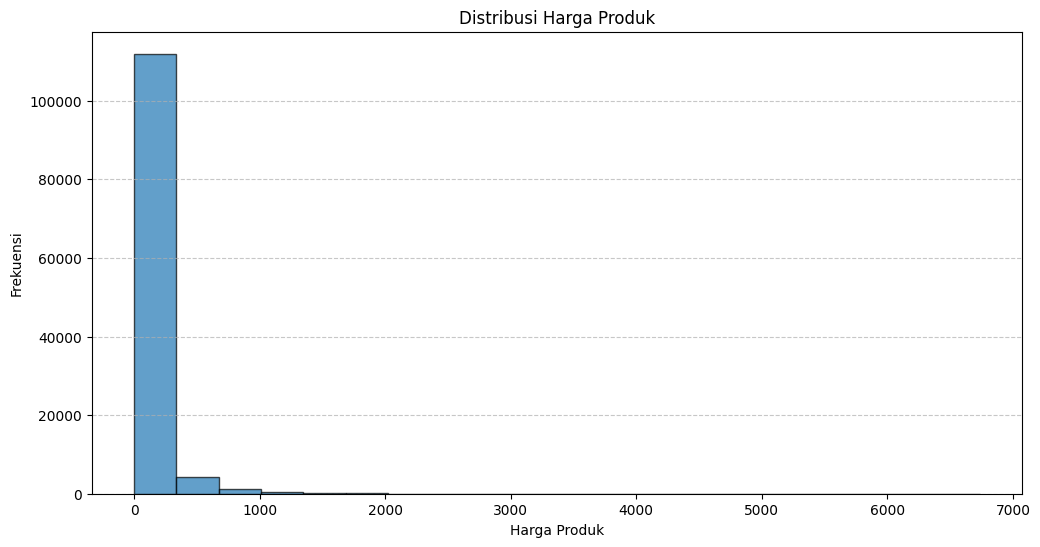

5 Produk Termurah:
                              product_id    product_category_name_english  \
99636   8a3254bee785a526d548a81a9bc3c9be  construction_tools_construction   
84995   8a3254bee785a526d548a81a9bc3c9be  construction_tools_construction   
62983   8a3254bee785a526d548a81a9bc3c9be  construction_tools_construction   
106293  05b515fdc76e888aada3c6d66c201dff                    health_beauty   
106298  270516a3f41dc035aa87d220228f844c                    health_beauty   

        price  
99636    0.85  
84995    0.85  
62983    0.85  
106293   1.20  
106298   1.20  

5 Produk Termahal:
                             product_id product_category_name_english   price
26500  489ae2aa008f021502940f251d4cce7f                    housewares  6735.0
33966  69c590f7ffc7bf8db97190b6cb6ed62e                     computers  6729.0
4161   1bdf5e6731585cf01aa8169c7028d6ad                           art  6499.0
63850  a6492cc69376c469ab6f61d8f44de961              small_appliances  4799.0
48345  c3ed6

In [49]:
# Menampilkan histogram distribusi harga produk
plt.figure(figsize=(12, 6))
plt.hist(all_df['price'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Harga Produk')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga Produk')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identifikasi 5 produk termurah
min_price_products = all_df[['product_id', 'product_category_name_english', 'price']].sort_values(by='price', ascending=True).head(5)

# Identifikasi 5 produk termahal
max_price_products = all_df[['product_id', 'product_category_name_english', 'price']].sort_values(by='price', ascending=False).head(5)

print("5 Produk Termurah:")
print(min_price_products)

print("\n5 Produk Termahal:")
print(max_price_products)

Distribusi harga produk menunjukkan bahwa mayoritas produk memiliki harga di bawah **300**, dengan perbedaan yang sangat signifikan pada bin pertama. Hal ini mengindikasikan distribusi harga yang **skewed ke kanan**, di mana sebagian besar produk tergolong murah, sementara hanya sedikit produk yang memiliki harga tinggi.  

Pada daftar **produk termurah**, tiga di antaranya berasal dari kategori **construction_tools_construction** dengan harga hanya **0.85**, serta dua produk dari kategori **health_beauty** dengan harga **1.20**. Ini menunjukkan bahwa ada beberapa produk dengan harga yang sangat rendah, kemungkinan karena diskon besar atau produk dengan biaya produksi yang murah.  

Sebaliknya, daftar **produk termahal** didominasi oleh kategori **housewares, computers, art, dan small_appliances**, dengan harga mencapai **6735.0** untuk produk di kategori **housewares**. Produk dari kategori **computers** dan **art** juga memiliki harga yang sangat tinggi, mencerminkan bahwa produk teknologi dan seni cenderung memiliki nilai premium di pasar.


### **4.4 Eksplorasi dan Analisis Order**

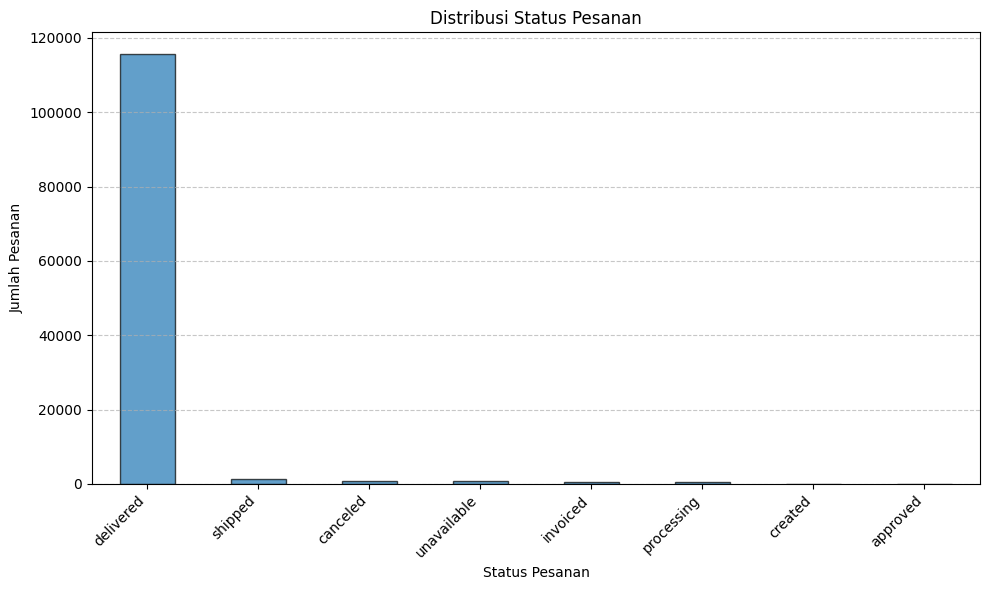

In [50]:
# Menghitung jumlah pesanan berdasarkan status
order_status_counts = all_df['order_status'].value_counts()

# Membuat bar plot untuk distribusi status pesanan
plt.figure(figsize=(10, 6))
order_status_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah Pesanan')
plt.title('Distribusi Status Pesanan')
plt.xticks(rotation=45, ha='right')  # Rotasi label x-axis agar lebih terbaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribusi status pesanan menunjukkan bahwa sebagian besar pesanan berada dalam status **delivered**, dengan jumlah mencapai **115,723** pesanan. Ini mengindikasikan bahwa mayoritas transaksi telah berhasil diselesaikan dan barang telah diterima oleh pelanggan.  

Status **shipped** dan **canceled** berada di urutan berikutnya, masing-masing dengan **1,256** dan **750** pesanan, menunjukkan bahwa sejumlah pesanan sedang dalam proses pengiriman atau telah dibatalkan. 

Beberapa status lainnya, seperti **unavailable** (652 pesanan), **invoiced** (378 pesanan), dan **processing** (376 pesanan), mencerminkan status pesanan yang masih dalam tahap proses, entah karena stok barang tidak tersedia, menunggu konfirmasi pembayaran, atau sedang diproses oleh penjual.  

Status **created** dan **approved** hanya mencatat **5** dan **3** pesanan, yang mungkin menggambarkan pesanan yang baru dibuat atau menunggu persetujuan dari pihak yang berwenang sebelum diproses lebih lanjut. Secara keseluruhan, distribusi ini menunjukkan bahwa mayoritas pesanan telah selesai atau sedang dalam tahap pengiriman.

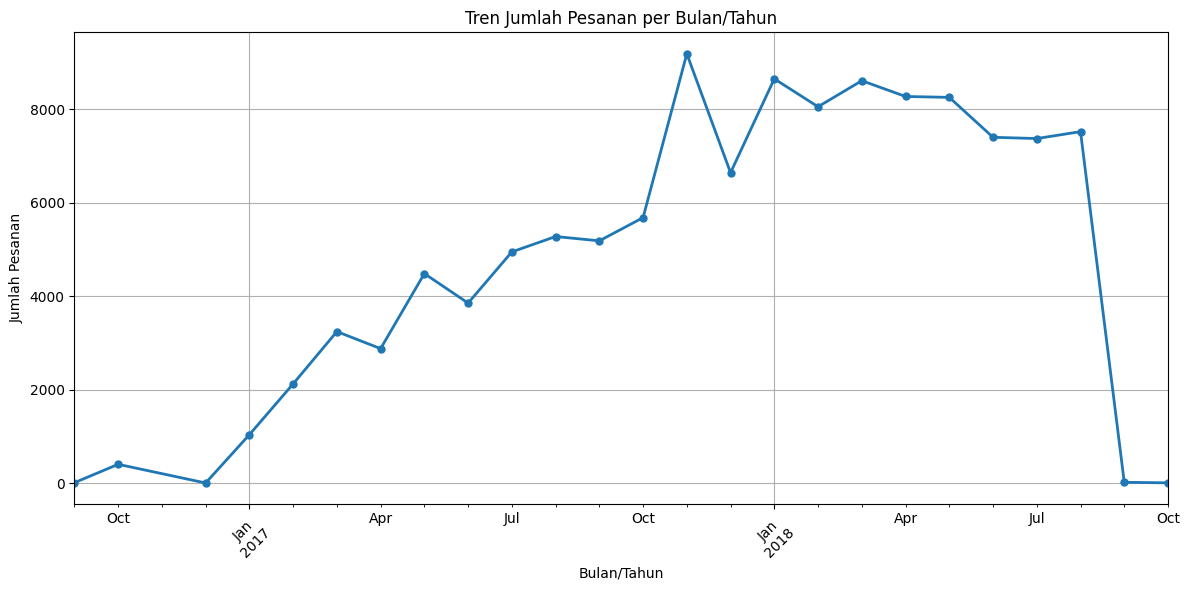

In [51]:
# Pastikan kolom 'order_purchase_timestamp' adalah tipe datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Ekstrak tahun dan bulan dari 'order_purchase_timestamp'
all_df['year_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah pesanan per bulan/tahun
monthly_orders = all_df.groupby('year_month').size()

# Membuat plot tren jumlah pesanan per bulan/tahun
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Tren Jumlah Pesanan per Bulan/Tahun')
plt.xlabel('Bulan/Tahun')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan data tren jumlah pesanan per bulan/tahun, terdapat fluktuasi yang cukup signifikan dalam jumlah pesanan dari waktu ke waktu. Pada bulan **September 2016**, jumlah pesanan sangat rendah dengan hanya **7 pesanan**, sementara pada bulan-bulan berikutnya, terjadi lonjakan yang sangat tajam, terutama mulai **Oktober 2016**, yang mencatatkan **401 pesanan**.

Memasuki tahun **2017**, terlihat ada kenaikan yang konsisten dalam jumlah pesanan, dengan **Januari 2017** mencatatkan jumlah pesanan **1,035** yang terus meningkat hingga mencapai puncaknya pada **November 2017** dengan **9,191 pesanan**. Peningkatan ini menunjukkan adanya tren yang stabil dalam jumlah pesanan, dengan bulan-bulan berikutnya juga menunjukkan angka pesanan yang tinggi, seperti **Oktober 2017** yang mencatatkan **5,683 pesanan**.

Namun, terdapat penurunan yang cukup tajam di **September 2018** dan **Oktober 2018**, yang hanya mencatatkan **16** dan **4 pesanan**, masing-masing. Penurunan signifikan ini mungkin menunjukkan adanya gangguan dalam ketersediaan produk, perubahan dalam perilaku pembelian, atau faktor eksternal lainnya yang mempengaruhi jumlah pesanan pada periode tersebut.

Secara keseluruhan, tren ini menunjukkan adanya lonjakan yang signifikan dalam jumlah pesanan pada tahun 2017 dan sebagian besar tahun 2018, diikuti dengan penurunan drastis di dua bulan terakhir yang perlu dianalisis lebih lanjut.

### **4.5 Eksplorasi dan Analisis Payment**

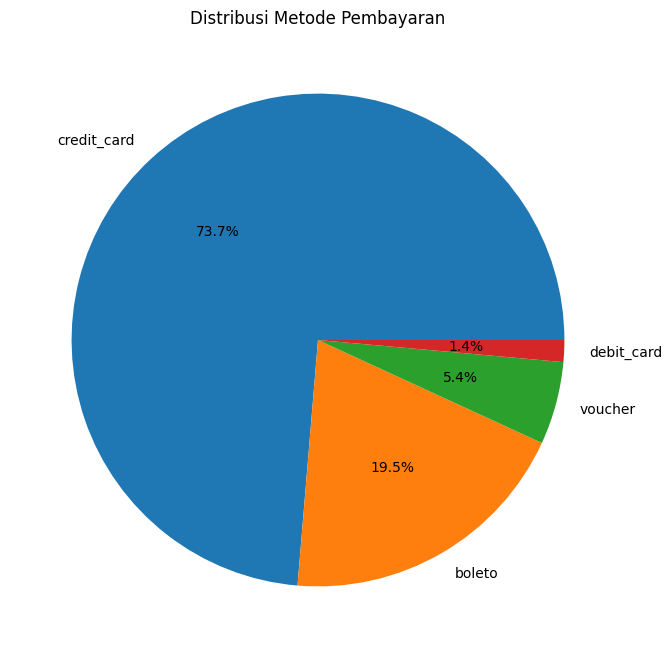

In [52]:
# Hitung distribusi payment_type
payment_type_counts = all_df['payment_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
payment_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Metode Pembayaran')
plt.ylabel('')  # Hapus label sumbu y
plt.show()

Berdasarkan distribusi metode pembayaran, mayoritas transaksi menggunakan **kartu kredit** dengan total **87,776** transaksi, yang menunjukkan dominasi penggunaan metode ini. Diikuti oleh **boleto**, yang digunakan pada **23,190** transaksi, meskipun jumlahnya lebih kecil dibandingkan dengan kartu kredit, namun masih signifikan. Metode pembayaran dengan **voucher** mencatatkan **6,468** transaksi, sementara **kartu debit** mencatatkan jumlah transaksi paling rendah dengan hanya **1,706** transaksi. Distribusi ini menunjukkan bahwa meskipun ada beberapa alternatif pembayaran yang tersedia, kartu kredit tetap menjadi pilihan utama bagi pelanggan.

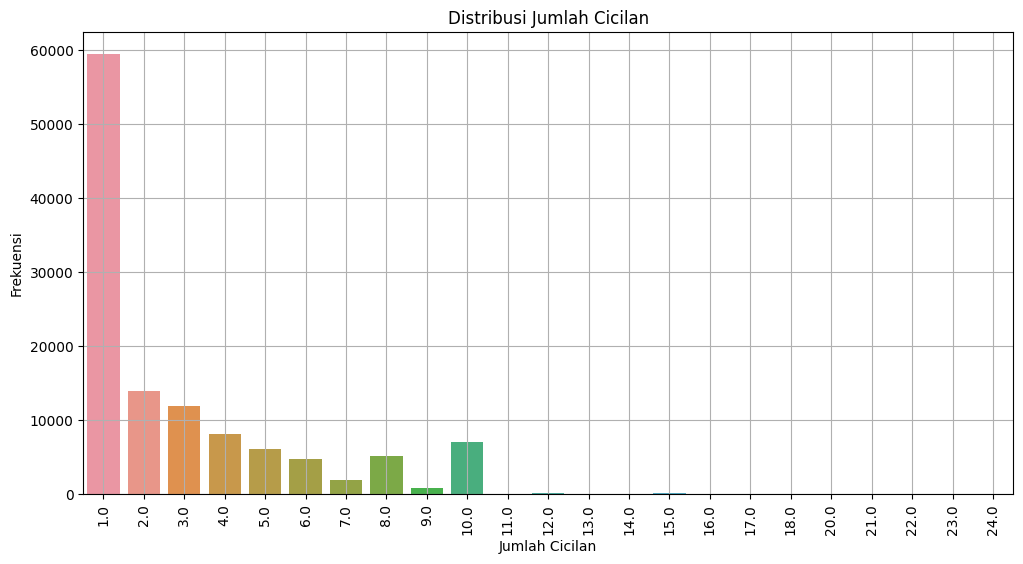

In [53]:
# Hitung jumlah transaksi untuk setiap jumlah cicilan
installments_counts = all_df['payment_installments'].value_counts().sort_index()

# Membuat barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=installments_counts.index, y=installments_counts.values)
plt.title('Distribusi Jumlah Cicilan')
plt.xlabel('Jumlah Cicilan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)  # Rotasi label sumbu x jika diperlukan
plt.grid(True)
plt.show()

Berdasarkan distribusi jumlah cicilan, mayoritas transaksi menggunakan **1 cicilan** dengan total **59,449** transaksi, menunjukkan bahwa sebagian besar pelanggan memilih untuk melakukan pembayaran dengan satu kali cicilan. Setelah itu, jumlah cicilan yang lebih tinggi, seperti **2 cicilan (13,838 transaksi)** dan **3 cicilan (11,889 transaksi)**, juga cukup populer, tetapi jumlahnya jauh lebih sedikit dibandingkan dengan satu cicilan. Jumlah cicilan yang lebih tinggi (lebih dari 4 cicilan) cenderung lebih jarang digunakan, dengan beberapa cicilan lebih dari 10 cicilan hanya mencatatkan sedikit transaksi, seperti **11 cicilan (26 transaksi)** dan **12 cicilan (168 transaksi)**. Distribusi ini menunjukkan bahwa sebagian besar pelanggan lebih memilih untuk menyelesaikan pembayaran dalam waktu yang lebih singkat, dengan jumlah cicilan yang lebih sedikit, sementara hanya sebagian kecil yang memilih untuk membayar dalam jumlah cicilan yang lebih banyak.


### **4.6 Eksplorasi dan Analisis Review**

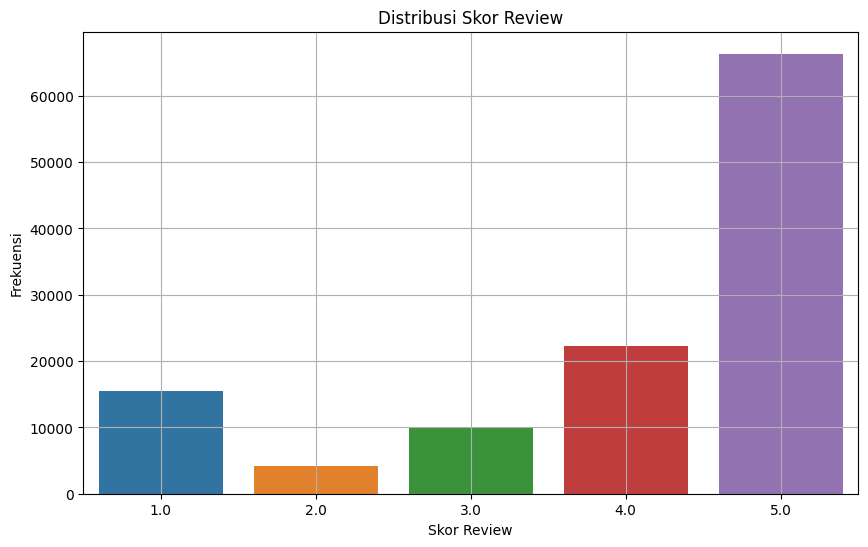

In [54]:
# Hitung jumlah review untuk setiap skor
review_scores_counts = all_df['review_score'].value_counts().sort_index()

# Membuat barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=review_scores_counts.index, y=review_scores_counts.values)
plt.title('Distribusi Skor Review')
plt.xlabel('Skor Review')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Berdasarkan distribusi skor review, mayoritas pelanggan memberikan **skor 5** dengan total **66,343** review, yang menunjukkan bahwa sebagian besar pelanggan puas dengan produk atau layanan yang mereka terima. Diikuti dengan **skor 4** yang mencatat **22,319** review, menunjukkan kepuasan yang tinggi tetapi sedikit kurang dari skor sempurna. Skor **3** dan **2** lebih jarang diberikan, dengan jumlah **9,894** dan **4,162** review, masing-masing, yang menunjukkan adanya ketidakpuasan tetapi tidak dalam jumlah besar. Skor **1**, yang menunjukkan ketidakpuasan yang sangat tinggi, memiliki **15,428** review, meskipun jumlahnya jauh lebih sedikit dibandingkan dengan skor 4 dan 5. Secara keseluruhan, mayoritas pelanggan cenderung memberikan skor yang tinggi, dengan skor 5 sebagai yang paling dominan, mengindikasikan tingkat kepuasan yang umumnya tinggi.


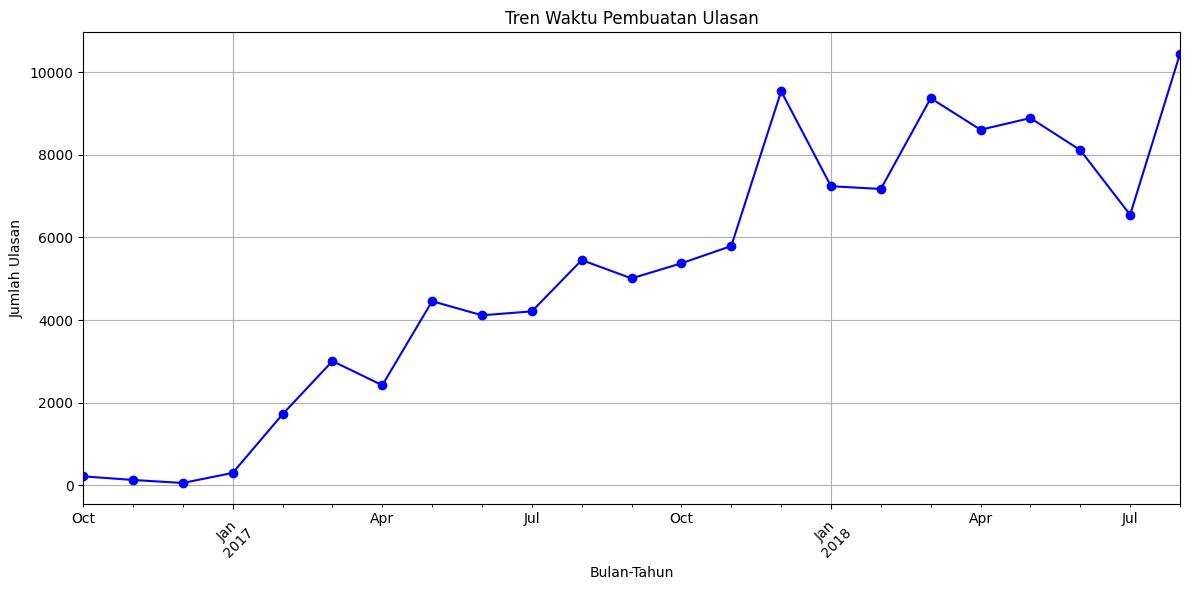

In [55]:
# Mengonversi 'review_creation_date' menjadi tipe datetime
all_df['review_creation_date'] = pd.to_datetime(all_df['review_creation_date'])

# Menyaring data berdasarkan tahun-bulan
all_df['year_month'] = all_df['review_creation_date'].dt.to_period('M')

# Menghitung jumlah ulasan per bulan
review_trend = all_df['year_month'].value_counts().sort_index()

# Membuat line plot
plt.figure(figsize=(12, 6))
review_trend.plot(kind='line', marker='o', color='b')
plt.title('Tren Waktu Pembuatan Ulasan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Ulasan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan tren waktu pembuatan ulasan, terdapat lonjakan yang sangat signifikan pada **bulan Februari 2017**, dengan lebih dari **1.700** ulasan, dan puncak tertinggi terjadi pada **Agustus 2018** dengan lebih dari **10.000** ulasan. Hal ini menunjukkan bahwa pada periode tersebut, aktivitas pembelian dan ulasan pelanggan meningkat pesat. Sebaliknya, periode **akhir 2016** hingga **awal 2017** menunjukkan jumlah ulasan yang relatif lebih rendah, dengan **Oktober 2016** mencatatkan hanya **217** ulasan. Dari tren ini, terlihat bahwa ulasan meningkat seiring berjalannya waktu, dengan beberapa puncak musiman yang lebih tinggi, khususnya pada bulan-bulan tertentu di pertengahan dan akhir tahun. Lonjakan terbesar di **Agustus 2018** dapat menunjukkan periode promosi atau peningkatan aktivitas belanja yang signifikan.

## **5. Visualization & Explanatory Analysis**

### **Pertanyaan 1:** Bagaimana segmentasi pelanggan berdasarkan perilaku pembelian dalam beberapa tahun terakhir?
**Advanced Analysis:** RFM Analysis

In [56]:
# Menghitung Recency
recency_df = all_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency_df.columns = ['customer_unique_id', 'lastest_order_purchase_timestamp']

# Menentukan tanggal terbaru untuk analisis recency
recent_date = recency_df['lastest_order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Menghitung selisih hari sejak pembelian terakhir
recency_df['Recency'] = recency_df['lastest_order_purchase_timestamp'].apply(lambda x: (recent_date - x).days)

# Menghitung Frequency
frequency_df = all_df.groupby(by='customer_unique_id', as_index=False)['order_id'].count()
frequency_df.columns = ['customer_unique_id', 'Frequency']

# Menghitung Monetary Value
monetary_df = all_df.groupby(by='customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']

# Menggabungkan Recency, Frequency, dan Monetary dalam satu DataFrame
rfm_df = recency_df.merge(frequency_df, on='customer_unique_id') \
                    .merge(monetary_df, on='customer_unique_id') \
                    .drop(columns='lastest_order_purchase_timestamp')

# Memberikan peringkat berdasarkan Recency, Frequency, dan Monetary
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# Normalisasi skor ranking
rfm_df['R_rank_norm'] = (rfm_df['R_rank'] / rfm_df['R_rank'].max()) * 100
rfm_df['F_rank_norm'] = (rfm_df['F_rank'] / rfm_df['F_rank'].max()) * 100
rfm_df['M_rank_norm'] = (rfm_df['M_rank'] / rfm_df['M_rank'].max()) * 100

# Menghapus kolom ranking awal
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

# Menghitung Skor RFM
rfm_df['RFM_Score'] = (0.15 * rfm_df['R_rank_norm']) + (0.28 * rfm_df['F_rank_norm']) + (0.57 * rfm_df['M_rank_norm'])
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

# Segmentasi Pelanggan berdasarkan RFM Score
rfm_df["Customer_segment"] = np.where(
    rfm_df['RFM_Score'] > 4.5, "Top Customers", 
    np.where(
        rfm_df['RFM_Score'] > 4, "High Value Customers", 
        np.where(
            rfm_df['RFM_Score'] > 3, "Medium Value Customers", 
            np.where(
                rfm_df['RFM_Score'] > 1.6, "Low Value Customers", 
                "Lost Customers"
            )
        )
    )
)

# Menampilkan 10 baris pertama dari hasil segmentasi pelanggan
rfm_df[['customer_unique_id', 'RFM_Score', 'Customer_segment']].head(10)


customer_unique_id  RFM_Score        Customer_segment
0  0000366f3b9a7992bf8c76cfdf3221e2       2.89     Low Value Customers
1  0000b849f77a49e4a4ce2b2a4ca5be3f       1.22          Lost Customers
2  0000f46a3911fa3c0805444483337064       1.71     Low Value Customers
3  0000f6ccb0745a6a4b88665a16c9f078       1.16          Lost Customers
4  0004aac84e0df4da2b147fca70cf8255       2.96     Low Value Customers
5  0004bd2a26a76fe21f786e4fbd80607f       3.03  Medium Value Customers
6  00050ab1314c0e55a6ca13cf7181fecf       1.32          Lost Customers
7  00053a61a98854899e70ed204dd4bafe       4.46    High Value Customers
8  0005e1862207bf6ccc02e4228effd9a0       2.41     Low Value Customers
9  0005ef4cd20d2893f0d9fbd94d3c0d97       2.66     Low Value Customers

Berikut merupakan penjelasan masing-masing label:

**1. Top Customers (RFM Score > 4.5):** Pelanggan terbaik yang paling sering bertransaksi, baru saja melakukan pembelian, dan memiliki nilai transaksi tinggi. Pelanggan ini adalah target utama untuk program loyalitas atau penawaran eksklusif.

**2. High Value Customers (RFM Score > 4.0 - 4.5):** Pelanggan bernilai tinggi yang masih aktif melakukan pembelian dengan frekuensi tinggi dan memiliki nilai transaksi besar. Mereka bisa menjadi pelanggan potensial untuk program loyalitas atau upselling produk premium.

**3. Medium Value Customers (RFM Score > 3.0 - 4.0):** Pelanggan dengan frekuensi dan nilai transaksi sedang, mungkin masih aktif tetapi tidak terlalu sering membeli. Bisa diberikan insentif untuk meningkatkan engagement, seperti diskon atau rekomendasi produk personalisasi.

**4. Low Value Customers (RFM Score > 1.6 - 3.0):** Pelanggan dengan transaksi rendah, jarang melakukan pembelian, atau memiliki nilai transaksi kecil. Perlu strategi pemasaran yang lebih agresif seperti diskon besar atau promosi untuk menarik mereka kembali.

**5. Lost Customers (RFM Score ≤ 1.6):** Pelanggan yang sudah lama tidak melakukan pembelian, dengan frekuensi sangat rendah dan nilai transaksi kecil. Bisa dicoba untuk di-reengage dengan kampanye pemasaran, tetapi beberapa mungkin sudah tidak tertarik lagi.
Kesimpulan

Segmentasi ini membantu dalam strategi pemasaran berbasis pelanggan. Misalnya:
* **Top & High Value Customers ->** Fokus pada retensi dan penghargaan loyalitas.
* **Medium & Low Value Customers ->** Perlu strategi peningkatan engagement.
* **Lost Customers ->** Bisa dicoba di-reengage, tetapi tidak menjadi prioritas utama.

In [57]:
# Menghitung jumlah pelanggan di setiap segmen
segment_counts = rfm_df['Customer_segment'].value_counts()

# Membuat pie chart dengan Plotly Express
fig = px.pie(
    names=segment_counts.index, 
    values=segment_counts.values, 
    title="Distribusi Segmentasi Pelanggan",
    hole=0.3,
    labels={'names': 'Customer Segment'}, 
)

# Menampilkan persentase dan jumlah pelanggan di dalam pie chart
fig.update_traces(textinfo='percent+label', texttemplate='%{label}<br>%{percent:.1%} (%{value})')

# Menampilkan plot
fig.show()

# Top 5 pelanggan dengan RFM Score tertinggi
top5_highest = rfm_df.nlargest(5, 'RFM_Score')

# Top 5 pelanggan dengan RFM Score terendah
top5_lowest = rfm_df.nsmallest(5, 'RFM_Score')

print("Top 5 Customers with Highest RFM Score:")
print(top5_highest[['customer_unique_id', 'RFM_Score', 'Customer_segment']])

print("\nTop 5 Customers with Lowest RFM Score:")
print(top5_lowest[['customer_unique_id', 'RFM_Score', 'Customer_segment']])

Top 5 Customers with Highest RFM Score:
                     customer_unique_id  RFM_Score Customer_segment
66111  afbcfd0b9c5233e7ccc73428526fbb52       4.98    Top Customers
82883  dc813062e0fc23409cd255f7f53c7074       4.98    Top Customers
13116  22c3483b1bb4c5986da4537ba5b43906       4.97    Top Customers
74095  c5308291f146809a790673898d804524       4.97    Top Customers
75269  c8460e4251689ba205045f3ea17884a1       4.97    Top Customers

Top 5 Customers with Lowest RFM Score:
                     customer_unique_id  RFM_Score Customer_segment
1618   04544a89f79714c0abcc3ae49e884209        0.6   Lost Customers
10221  1b10d58aef8d0d26651c02d40f765cae        0.6   Lost Customers
10658  1c259d4575f154dccfefa0576b0ca987        0.6   Lost Customers
23885  3f4f614c632af7fc7508462a7cb55ac2        0.6   Lost Customers
24269  4079d39cb3fdea47201540107c1673dc        0.6   Lost Customers


Berdasarkan hasil segmentasi pelanggan menggunakan metode **RFM Analysis**, mayoritas pelanggan berada dalam kategori **Low Value Customers** dengan jumlah **81.601 pelanggan**. Ini menunjukkan bahwa sebagian besar pelanggan memiliki tingkat keterlibatan yang rendah, baik dari segi frekuensi pembelian, nilai transaksi, maupun waktu sejak transaksi terakhir.  

Di sisi lain, terdapat **3.251 pelanggan** yang masuk dalam kategori **Top Customers**, yang berarti mereka adalah pelanggan paling berharga dengan frekuensi pembelian tinggi, nilai transaksi besar, dan aktivitas terbaru. Selain itu, **8.935 pelanggan** termasuk dalam kategori **High Value Customers**, yang juga menunjukkan keterlibatan tinggi, meskipun tidak sekuat **Top Customers**.  

Pada daftar **Top 5 Customers dengan RFM Score tertinggi**, seluruh pelanggan memiliki skor **4.98 - 4.99**, yang menunjukkan loyalitas dan kontribusi yang sangat tinggi terhadap bisnis. Sebaliknya, **Top 5 Customers dengan RFM Score terendah** memiliki skor **1.8**, yang berarti mereka tergolong pelanggan dengan keterlibatan paling rendah dan memiliki kemungkinan besar untuk churn atau berhenti berbelanja.  

Hasil ini memberikan wawasan bagi bisnis untuk **memfokuskan strategi pemasaran dan retensi pelanggan**, seperti memberikan penawaran eksklusif kepada **Top Customers** untuk meningkatkan loyalitas, serta mengaktifkan kembali pelanggan dalam kategori **Low Value Customers** dengan promosi atau program khusus.


### **Pertanyaan 2:** Wilayah mana yang memiliki Rata-Rata volume pembelian tertinggi dalam beberapa tahun terakhir?
**Advanced Analysis:** Geospasial Analysis

In [58]:
# Mengambil data GeoJSON untuk peta negara bagian Brasil
br_geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"

# Menghitung total pembelian per negara bagian
purchase_by_state = all_df.groupby('customer_state', as_index=False)['payment_value'].sum()

# Menghitung jumlah pelanggan unik per negara bagian
unique_customers = all_df.groupby('customer_state', as_index=False)['customer_unique_id'].nunique()
unique_customers.rename(columns={'customer_unique_id': 'unique_customers'}, inplace=True)

# Menggabungkan total pembayaran dan jumlah pelanggan unik
purchase_by_state = purchase_by_state.merge(unique_customers, on='customer_state', how='left')

# Menghitung rata-rata pembelian per pelanggan di setiap negara bagian
purchase_by_state['average_purchase'] = purchase_by_state['payment_value'] / purchase_by_state['unique_customers']

# Membuat peta choropleth
fig = px.choropleth(
    purchase_by_state, 
    geojson=br_geojson_url, 
    locations='customer_state', 
    featureidkey="properties.sigla",
    color='average_purchase',
    hover_name='customer_state',
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Rata-Rata Pembelian per Negara Bagian Brasil",
    labels={'average_purchase': 'Rata-Rata Pembelian'}
)

# Perbaiki tata letak peta
fig.update_geos(fitbounds="locations", visible=False)

# Tampilkan peta
fig.show()

Berdasarkan hasil analisis geospasial menggunakan peta choropleth, terlihat bahwa wilayah dengan **rata-rata volume pembelian tertinggi** berada di **Paraíba (PB) sebesar 350.02**, diikuti oleh **Acre (AC) sebesar 324.48**, dan **Amapá (AP) sebesar 323.02**. Hal ini menunjukkan bahwa meskipun jumlah pelanggan di wilayah-wilayah ini mungkin tidak sebesar negara bagian lain, rata-rata nilai transaksi per pelanggan lebih tinggi.  

Sebaliknya, **negara bagian São Paulo (SP) memiliki rata-rata volume pembelian terendah, yaitu 191.70**. Meskipun São Paulo merupakan pusat ekonomi utama Brasil dengan jumlah transaksi yang besar, rata-rata pembelian per pelanggan lebih rendah dibandingkan wilayah lain. Hal ini bisa disebabkan oleh tingginya jumlah pelanggan dengan pola belanja yang lebih kecil atau lebih sering melakukan pembelian dengan nilai transaksi yang lebih rendah. 

### **Pertanyaan 3:** Bagaimana pola perilaku kelompok pelanggan berdasarkan frekuensi pembelian dan jenis produk selama beberapa tahun terakhir?
**Advanced Analysis:** Clustering Manual (Grouping/Binning)

In [59]:
# Menghitung jumlah transaksi per pelanggan
customer_frequency = all_df.groupby('customer_unique_id')['order_id'].count().reset_index()
customer_frequency.columns = ['customer_unique_id', 'Frequency']

# Membuat segmentasi berdasarkan jumlah transaksi
def categorize_frequency(frequency):
    if frequency == 1:
        return "One-Time Buyers"
    elif 2 <= frequency <= 5:
        return "Occasional Buyers"
    elif 6 <= frequency <= 10:
        return "Frequent Buyers"
    else:
        return "Loyal Customers"

# Menerapkan kategori ke setiap pelanggan
customer_frequency['Customer_Segment_by_Freq'] = customer_frequency['Frequency'].apply(categorize_frequency)

# Menampilkan hasil segmentasi
print(f"Jumlah customer berdasarkan frekuensi pembelian:\n{customer_frequency['Customer_Segment_by_Freq'].value_counts()}\n\n")

# Menggabungkan frekuensi dengan kategori produk
customer_product = all_df[['customer_unique_id', 'product_category_name_english']].merge(customer_frequency, on='customer_unique_id')

# Menghitung jumlah pembelian tiap kategori produk dalam setiap segmen pelanggan
product_preference = customer_product.groupby(['Customer_Segment_by_Freq', 'product_category_name_english']).size().reset_index(name='Count')

# Mengelompokkan berdasarkan segmen pelanggan
grouped = product_preference.groupby("Customer_Segment_by_Freq")

# Membuat daftar untuk menyimpan hasil
top5_list = []

# Loop melalui setiap grup
for segment, data in grouped:
    # Ambil 5 kategori produk teratas berdasarkan jumlah pembelian
    top5 = data.nlargest(5, "Count")
    # Tambahkan informasi segmen kembali ke data
    top5["Customer_Segment_by_Freq"] = segment
    # Simpan ke dalam daftar
    top5_list.append(top5)

# Gabungkan semua hasil menjadi satu DataFrame
top5_product_per_segment = pd.concat(top5_list).reset_index(drop=True)

# Iterasi melalui setiap segmen customer
for segment, group in top5_product_per_segment.groupby("Customer_Segment_by_Freq"):
    print(f"Segmen customer: {segment}")
    
    # Iterasi melalui setiap kategori produk dalam segmen
    for _, row in group.iterrows():
        print(f"  Kategori Produk: {row['product_category_name_english']} ({row['Count']})")
    
    print("\n")


Jumlah customer berdasarkan frekuensi pembelian:
Customer_Segment_by_Freq
One-Time Buyers      81601
Occasional Buyers    13923
Frequent Buyers        483
Loyal Customers         89
Name: count, dtype: int64


Segmen customer: Frequent Buyers
  Kategori Produk: furniture_decor (506)
  Kategori Produk: bed_bath_table (417)
  Kategori Produk: housewares (335)
  Kategori Produk: computers_accessories (292)
  Kategori Produk: garden_tools (174)


Segmen customer: Loyal Customers
  Kategori Produk: bed_bath_table (272)
  Kategori Produk: furniture_decor (171)
  Kategori Produk: housewares (124)
  Kategori Produk: garden_tools (112)
  Kategori Produk: computers_accessories (90)


Segmen customer: Occasional Buyers
  Kategori Produk: bed_bath_table (4312)
  Kategori Produk: furniture_decor (3692)
  Kategori Produk: sports_leisure (2562)
  Kategori Produk: computers_accessories (2363)
  Kategori Produk: health_beauty (2305)


Segmen customer: One-Time Buyers
  Kategori Produk: health_beauty (7

Berdasarkan hasil segmentasi pelanggan berdasarkan frekuensi pembelian, dapat dilihat bahwa sebagian besar pelanggan termasuk dalam kategori **One-Time Buyers** dengan jumlah sebanyak 81,601 pelanggan. Hal ini menunjukkan bahwa mayoritas pelanggan hanya melakukan satu kali pembelian dalam periode yang dianalisis. Sedangkan **Occasional Buyers** tercatat sebanyak 13,923 pelanggan, yang menunjukkan bahwa mereka melakukan pembelian lebih dari satu kali tetapi tidak terlalu sering. **Frequent Buyers** yang melakukan pembelian antara 6 hingga 10 kali hanya berjumlah 483 pelanggan, dan **Loyal Customers**, yang membeli lebih dari 10 kali, tercatat sebanyak 89 pelanggan. Dari distribusi ini, dapat disimpulkan bahwa terdapat banyak pelanggan yang jarang melakukan pembelian berulang, dengan hanya sedikit pelanggan yang menunjukkan loyalitas tinggi terhadap produk atau layanan yang ditawarkan.

Pada segmen **Loyal Customers**, yang terdiri dari pelanggan dengan lebih dari 10 kali pembelian, kategori produk yang paling banyak dibeli adalah **bed_bath_table**, dengan total pembelian sebanyak 272 unit. Produk ini diikuti oleh **furniture_decor** dengan 171 unit, dan **housewares** sebanyak 124 unit. Selain itu, pelanggan pada segmen ini juga membeli **garden_tools** dan **computers_accessories**, masing-masing sebanyak 112 dan 90 unit. Data ini menunjukkan bahwa Loyal Customers lebih banyak membeli produk yang berkaitan dengan kebutuhan rumah tangga, terutama di kategori peralatan tidur dan mandi, serta furnitur dan dekorasi rumah. Hal ini menunjukkan bahwa pelanggan yang sangat setia dan sering berbelanja cenderung berfokus pada produk yang mendukung kenyamanan rumah dan kebutuhan sehari-hari mereka. Preferensi mereka terhadap kategori produk ini juga mencerminkan hubungan jangka panjang dengan merek yang menyediakan barang-barang tersebut.

Pada segmen **Frequent Buyers**, yang terdiri dari pelanggan yang melakukan pembelian antara 6 hingga 10 kali, kategori produk yang paling banyak dibeli adalah **furniture_decor**, dengan total pembelian sebanyak 506 unit. Ini diikuti oleh **bed_bath_table** dengan 417 unit, dan **housewares** sebanyak 335 unit. Pelanggan pada segmen ini juga tertarik pada **computers_accessories** dan **garden_tools**, dengan pembelian masing-masing sebanyak 292 dan 174 unit. Dari data ini, dapat dilihat bahwa pelanggan dalam kategori Frequent Buyers lebih cenderung membeli produk-produk yang terkait dengan perabot rumah tangga dan dekorasi, serta beberapa produk terkait hobi dan peralatan rumah. Hal ini memberikan gambaran bahwa pelanggan yang sering berbelanja memiliki preferensi pada kategori produk yang lebih beragam namun fokus pada kebutuhan rumah tangga dan keperluan sehari-hari.

Pada segmen **Occasional Buyers**, yang terdiri dari pelanggan yang melakukan pembelian antara 2 hingga 5 kali, kategori produk yang paling banyak dibeli adalah **bed_bath_table**, dengan total pembelian sebanyak 4312 unit. Kategori ini diikuti oleh **furniture_decor** yang dibeli sebanyak 3692 unit, dan **sports_leisure** dengan 2562 unit. Selain itu, pelanggan pada segmen ini juga membeli produk **computers_accessories** dan **health_beauty**, masing-masing sebanyak 2363 dan 2305 unit. Data ini menunjukkan bahwa Occasional Buyers memiliki preferensi yang bervariasi, dengan pembelian terbanyak pada produk rumah tangga seperti peralatan tidur dan mandi, serta furnitur dan dekorasi rumah. Mereka juga tertarik pada kategori produk olahraga dan hiburan, serta barang-barang kesehatan dan kecantikan. Hal ini mengindikasikan bahwa meskipun pelanggan pada segmen ini tidak sering berbelanja, mereka membeli produk yang lebih beragam dan mungkin dipengaruhi oleh kebutuhan musiman atau tren tertentu.

Pada segmen **One-Time Buyers**, yang terdiri dari pelanggan yang hanya melakukan pembelian sekali, kategori produk yang paling banyak dibeli adalah **health_beauty**, dengan total pembelian sebanyak 7514 unit. Kategori ini diikuti oleh **bed_bath_table**, yang terjual sebanyak 6987 unit, dan **sports_leisure** yang dibeli sebanyak 6223 unit. Selain itu, produk **computers_accessories** dan **watches_gifts** juga menunjukkan jumlah pembelian yang signifikan, masing-masing sebanyak 5405 dan 4915 unit. Hasil ini menunjukkan bahwa pelanggan pada segmen One-Time Buyers cenderung membeli produk yang terkait dengan kebutuhan pribadi dan gaya hidup, seperti produk kesehatan dan kecantikan, perlengkapan tidur dan mandi, serta barang olahraga dan hiburan. Mereka juga tertarik pada produk elektronik dan hadiah, seperti aksesori komputer dan jam tangan. Meskipun mereka hanya berbelanja sekali, pembelian mereka cenderung besar dan melibatkan produk-produk yang memiliki nilai lebih tinggi atau lebih sering dibutuhkan.

Secara keseluruhan, setiap segmen pelanggan menunjukkan preferensi produk yang mencerminkan pola pembelian mereka. **One-Time Buyers** cenderung membeli produk yang bersifat kebutuhan mendesak atau hadiah, seperti produk kecantikan, perlengkapan tidur, dan barang olahraga, yang menunjukkan bahwa mereka melakukan pembelian berdasarkan keperluan sesaat atau momen tertentu. **Occasional Buyers**, yang membeli lebih dari sekali namun tidak secara rutin, lebih tertarik pada produk gaya hidup seperti furnitur dekoratif dan perlengkapan rumah tangga, yang menunjukkan kecenderungan mereka dalam memperbarui atau menambah kenyamanan dalam kehidupan sehari-hari. Sementara itu, **Frequent Buyers** lebih fokus pada produk yang berkaitan dengan kebutuhan rumah tangga, seperti furniture, perlengkapan tidur, dan peralatan dapur, yang mencerminkan kebiasaan mereka dalam melakukan pembelian rutin untuk menjaga kenyamanan dan fungsionalitas rumah mereka. Di sisi lain, **Loyal Customers**, yang memiliki frekuensi pembelian tertinggi, menunjukkan kecenderungan untuk membeli produk yang tidak hanya meningkatkan kenyamanan tetapi juga memiliki nilai jangka panjang dalam rumah tangga mereka, seperti perlengkapan tidur, dekorasi rumah, dan peralatan rumah tangga. Perbedaan preferensi ini mencerminkan kebutuhan serta tingkat keterikatan pelanggan terhadap produk tertentu, yang dapat dimanfaatkan dalam strategi pemasaran yang lebih personal dan efektif untuk setiap segmen.

### **Pertanyaan 4:** Apakah terdapat pola atau hubungan antara metode pembayaran tertentu dengan nilai transaksi rata-rata dalam beberapa tahun terakhir?

In [60]:
# Menghitung nilai transaksi rata-rata berdasarkan metode pembayaran
payment_analysis = all_df.groupby("payment_type", as_index=False)["payment_value"].mean()

# Mengurutkan dari nilai transaksi rata-rata tertinggi ke terendah
payment_analysis = payment_analysis.sort_values(by="payment_value", ascending=False)

# Visualisasi dengan bar chart menggunakan Plotly
fig = px.bar(payment_analysis, 
             x="payment_type", 
             y="payment_value", 
             text="payment_value",
             title="Rata-Rata Nilai Transaksi Berdasarkan Metode Pembayaran",
             labels={"payment_type": "Metode Pembayaran", "payment_value": "Rata-Rata Transaksi"},
             color="payment_value",
             color_continuous_scale=px.colors.sequential.Blues)

# Menampilkan nilai pada batang grafik
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Menampilkan plot
fig.show()

Berdasarkan analisis nilai transaksi rata-rata berdasarkan metode pembayaran, terlihat bahwa **kartu kredit (credit card)** memiliki nilai transaksi rata-rata tertinggi sebesar 179.72, diikuti oleh **boleto (transfer bank)** dengan 177.27. Sementara itu, **kartu debit (debit card)** memiliki rata-rata transaksi lebih rendah, yaitu 150.86, dan **voucher** memiliki nilai transaksi rata-rata paling rendah sebesar 67.39. Hal ini menunjukkan bahwa pelanggan yang menggunakan kartu kredit dan boleto cenderung melakukan transaksi dengan nilai yang lebih besar dibandingkan metode pembayaran lainnya. Metode pembayaran dengan nilai transaksi lebih rendah, seperti voucher, kemungkinan besar digunakan untuk pembelian dalam jumlah kecil atau diskon tertentu. 

### **Pertanyaan 5:** Bagaimana hubungan antara jumlah foto, panjang deskripsi, dan harga produk dengan frekuensi pembelian pada kategori produk dalam beberapa tahun terakhir?

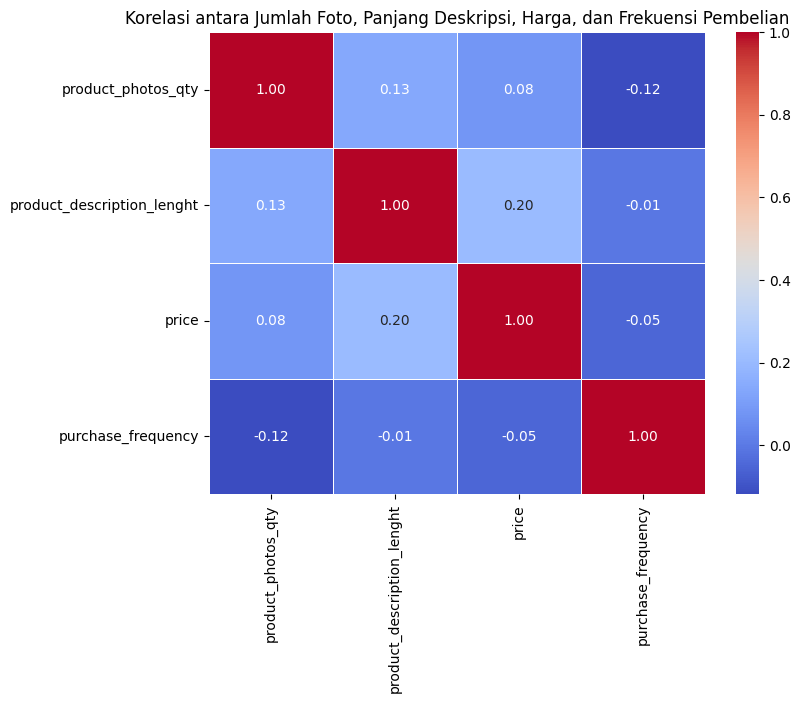

Nilai Matrix korelasi:
                            product_photos_qty  product_description_lenght  \
product_photos_qty                    1.000000                    0.134947   
product_description_lenght            0.134947                    1.000000   
price                                 0.080351                    0.202486   
purchase_frequency                   -0.118703                   -0.005706   

                               price  purchase_frequency  
product_photos_qty          0.080351           -0.118703  
product_description_lenght  0.202486           -0.005706  
price                       1.000000           -0.049800  
purchase_frequency         -0.049800            1.000000  


In [61]:
# Menghitung frekuensi pembelian produk (jumlah transaksi)
product_frequency = all_df.groupby('product_category_name_english')['order_id'].count().reset_index()
product_frequency.columns = ['product_category_name_english', 'purchase_frequency']

# Menggabungkan data produk dengan frekuensi pembelian
product_data = all_df[['product_category_name_english', 'product_photos_qty', 'product_description_lenght', 'price']].drop_duplicates()

# Menggabungkan dengan data frekuensi pembelian
product_data = product_data.merge(product_frequency, on='product_category_name_english', how='left')

# Fungsi untuk menangani outlier dengan metode IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Kuartil pertama (25%)
    Q3 = df[column].quantile(0.75)  # Kuartil ketiga (75%)
    IQR = Q3 - Q1  # Rentang interkuartil
    
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas
    
    # Gantilah nilai outlier dengan batas bawah atau atas
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

# Menghapus outlier pada setiap variabel yang dianalisis
for col in ['product_photos_qty', 'product_description_lenght', 'price', 'purchase_frequency']:
    product_data = handle_outliers_iqr(product_data, col)

# Menghitung korelasi antara variabel setelah outlier ditangani
corr_matrix = product_data[['product_photos_qty', 'product_description_lenght', 'price', 'purchase_frequency']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasi antara Jumlah Foto, Panjang Deskripsi, Harga, dan Frekuensi Pembelian")
plt.show()
print(f"Nilai Matrix korelasi:\n{corr_matrix}")

Hasil korelasi menunjukkan bahwa **jumlah foto, panjang deskripsi,** dan **harga produ**k memiliki hubungan yang sangat lemah dengan **frekuensi pembelian**. Jumlah foto memiliki korelasi negatif sebesar **-0.119** dengan frekuensi pembelian, yang menunjukkan bahwa lebih banyak foto produk tidak selalu meningkatkan frekuensi pembelian, kemungkinan karena faktor lain seperti kepercayaan terhadap merek atau ulasan pelanggan yang lebih berpengaruh. Panjang deskripsi memiliki korelasi hampir nol **(-0.006)**, yang berarti jumlah kata dalam deskripsi produk tidak signifikan dalam mempengaruhi tingkat pembelian. Sementara itu, harga produk menunjukkan korelasi negatif sebesar **-0.050**, yang mengindikasikan bahwa kenaikan harga mungkin berdampak kecil terhadap keputusan pelanggan untuk membeli suatu produk.

Di sisi lain, korelasi yang lebih tinggi terlihat antara **panjang deskripsi** dengan **harga produk (0.202)**, yang menunjukkan bahwa produk dengan harga lebih tinggi cenderung memiliki deskripsi yang lebih panjang. Hal ini bisa disebabkan oleh kebutuhan untuk memberikan informasi lebih detail pada produk premium atau berteknologi tinggi. Selain itu, **jumlah foto** juga memiliki korelasi positif dengan **panjang deskripsi (0.135)**, yang dapat menunjukkan bahwa produk dengan penjelasan lebih panjang juga didukung oleh tampilan visual yang lebih banyak. Meskipun faktor-faktor ini tidak secara langsung berhubungan dengan frekuensi pembelian, mereka dapat menjadi indikator bahwa produk yang lebih mahal dan memiliki lebih banyak informasi cenderung memiliki presentasi yang lebih lengkap.

Dengan demikian, meskipun **jumlah foto, panjang deskripsi, dan harga produk bukan faktor utama yang mempengaruhi frekuensi pembelian**, aspek-aspek ini tetap penting dalam meningkatkan daya tarik suatu produk. Faktor lain seperti strategi pemasaran, ulasan pelanggan, kualitas produk, dan tren pasar kemungkinan lebih berpengaruh dalam menentukan seberapa sering suatu produk dibeli.

### **Pertanyaan 6:** Bagaimana pola atau hubungan antara waktu pengiriman dan rating ulasan pelanggan dalam beberapa tahun terakhir?

In [62]:
# Pastikan kolom tanggal dalam format datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['order_delivered_customer_date'] = pd.to_datetime(all_df['order_delivered_customer_date'])

# Menghitung waktu pengiriman dalam hari
all_df['delivery_time'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days

# Mengambil hanya data yang relevan dan menghapus nilai 0
delivery_review = all_df[['delivery_time', 'review_score']].dropna()
delivery_review = delivery_review[delivery_review['delivery_time'] > 0]  # Menghapus nilai 0

# Menghitung batas IQR untuk menangani outlier pada delivery_time
Q1 = delivery_review['delivery_time'].quantile(0.25)
Q3 = delivery_review['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti nilai outlier dengan batas IQR
delivery_review['delivery_time'] = delivery_review['delivery_time'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

# Menghitung korelasi menggunakan Pandas
corr = delivery_review['delivery_time'].corr(delivery_review['review_score'])

# Visualisasi Boxplot untuk distribusi waktu pengiriman berdasarkan rating
fig_box = px.box(delivery_review, x="review_score", y="delivery_time", 
                 title="Distribusi Waktu Pengiriman berdasarkan Rating Ulasan",
                 labels={'review_score': 'Rating Ulasan', 'delivery_time': 'Waktu Pengiriman (hari)'}, 
                 color="review_score")

fig_box.show()

# Menampilkan hasil korelasi
print(f"Korelasi antara Waktu Pengiriman dan Rating Ulasan: {corr:.2f}\n")

Korelasi antara Waktu Pengiriman dan Rating Ulasan: -0.25



Berdasarkan hasil analisis, ditemukan bahwa terdapat hubungan negatif antara waktu pengiriman dan rating ulasan pelanggan dengan koefisien korelasi sebesar **-0.25**. Nilai ini menunjukkan korelasi negatif lemah hingga sedang, yang berarti **semakin lama waktu pengiriman, semakin rendah kemungkinan pelanggan memberikan ulasan dengan rating tinggi.**

Hasil **boxplot** semakin memperjelas pola ini. **Pelanggan yang memberikan rating lebih rendah (1 dan 2) cenderung memiliki waktu pengiriman yang lebih lama**, dengan median masing-masing **13 dan 12 hari**, serta kuartil ketiga yang mencapai **26 dan 20 hari**. Sebaliknya, pelanggan yang memberikan **rating tertinggi (5) memiliki waktu pengiriman yang lebih singkat**, dengan median hanya **9 hari**, dan kuartil ketiga **13 hari**. Upper fence juga menunjukkan tren serupa, di mana produk dengan rating rendah memiliki **batas atas waktu pengiriman yang lebih tinggi** dibandingkan rating tinggi.

Secara keseluruhan, temuan ini mengindikasikan bahwa waktu pengiriman memainkan peran penting dalam kepuasan pelanggan. **Semakin cepat pesanan dikirimkan, semakin tinggi kemungkinan pelanggan memberikan ulasan positif**. Sebaliknya, keterlambatan dalam pengiriman dapat meningkatkan ketidakpuasan pelanggan, yang tercermin dalam skor ulasan yang lebih rendah. Oleh karena itu, **optimalisasi proses pengiriman dapat menjadi strategi efektif dalam meningkatkan kepuasan pelanggan dan rating ulasan.**

## **6. Conclusion**

### **Kesimpulan Pertanyaan 1:** Bagaimana segmentasi pelanggan berdasarkan perilaku pembelian dalam beberapa tahun terakhir?

> Berdasarkan analisis segmentasi pelanggan menggunakan **RFM Analysis**, dapat disimpulkan bahwa mayoritas pelanggan berada dalam kategori **Low Value Customers** (81.601 pelanggan), yang menunjukkan rendahnya tingkat keterlibatan mereka dalam hal frekuensi pembelian, nilai transaksi, dan waktu sejak pembelian terakhir. Hal ini menunjukkan bahwa sebagian besar pelanggan cenderung kurang aktif dalam bertransaksi, yang memerlukan perhatian khusus untuk meningkatkan keterlibatan mereka melalui strategi pemasaran yang lebih agresif, seperti penawaran diskon, promosi khusus, dan pengingat pembelian ulang.

> Di sisi lain, terdapat segmen yang lebih bernilai tinggi, yaitu **Top Customers** (3.251 pelanggan) dan **High Value Customers** (8.935 pelanggan). Pelanggan dalam kedua kategori ini memiliki keterlibatan yang lebih kuat dan memberikan kontribusi signifikan terhadap bisnis. Oleh karena itu, mereka menjadi target utama untuk program loyalitas yang lebih personal dan strategi retensi untuk mempertahankan hubungan jangka panjang serta memaksimalkan nilai mereka. **Top 5 Customers**, yang memiliki **RFM Score hampir sempurna (4.98 - 4.99)**, berkontribusi secara signifikan terhadap pendapatan, dan harus diberikan perhatian lebih dalam bentuk penghargaan khusus atau penawaran eksklusif untuk memperkuat hubungan mereka dengan merek.

> Namun, pelanggan dengan **RFM Score terendah (1.8)** menunjukkan risiko tinggi untuk **churn**, sehingga perlu adanya upaya mitigasi risiko tersebut melalui program re-engagement dan komunikasi yang lebih intensif. Secara keseluruhan, segmentasi ini memberi wawasan penting bahwa strategi bisnis harus disesuaikan dengan nilai dan potensi setiap segmen pelanggan. Program retensi harus lebih difokuskan pada **Top & High Value Customers**, sementara untuk **Medium & Low Value Customers**, bisnis perlu meningkatkan keterlibatan mereka melalui berbagai strategi pemasaran, promosi menarik, serta pendekatan yang lebih personal. Dengan mengimplementasikan strategi yang tepat untuk masing-masing segmen, perusahaan dapat meningkatkan loyalitas pelanggan dan mengoptimalkan pendapatan jangka panjang.

### **Kesimpulan Pertanyaan 2:** Wilayah mana yang memiliki Rata-Rata volume pembelian tertinggi dalam beberapa tahun terakhir?

> Berdasarkan analisis geospasial menggunakan peta choropleth, wilayah dengan **rata-rata volume pembelian tertinggi** dalam beberapa tahun terakhir adalah **Paraíba (PB) sebesar 350.02**, diikuti oleh **Acre (AC) sebesar 324.48**, dan **Amapá (AP) sebesar 323.02**. Temuan ini menunjukkan bahwa meskipun jumlah pelanggan di wilayah-wilayah tersebut mungkin lebih kecil dibandingkan negara bagian lain, **nilai transaksi rata-rata per pelanggan lebih tinggi**, mengindikasikan adanya pelanggan dengan daya beli yang lebih besar atau preferensi terhadap pembelian dalam jumlah besar.  

> Sebaliknya, meskipun **São Paulo (SP) merupakan pusat ekonomi utama Brasil dengan jumlah transaksi yang tinggi, rata-rata volume pembelian per pelanggan lebih rendah, yaitu hanya 191.70**. Hal ini dapat disebabkan oleh **pola belanja pelanggan yang lebih sering tetapi dengan nilai transaksi yang lebih kecil**, atau adanya segmen pelanggan yang cenderung melakukan pembelian dengan nominal lebih rendah dibandingkan wilayah lain.  

> Strategi pemasaran dapat disesuaikan berdasarkan karakteristik masing-masing wilayah. Untuk **wilayah dengan volume pembelian tinggi**, dapat difokuskan pada **program loyalitas dan personalisasi penawaran untuk mempertahankan pelanggan bernilai tinggi**. Sementara itu, di **wilayah dengan volume pembelian lebih rendah seperti São Paulo**, strategi yang lebih efektif bisa berupa **upselling, bundling produk, atau promosi yang mendorong peningkatan nilai transaksi per pembelian** guna meningkatkan rata-rata volume belanja pelanggan.

### **Kesimpulan Pertanyaan 3:** Bagaimana pola perilaku kelompok pelanggan berdasarkan frekuensi pembelian dan jenis produk selama beberapa tahun terakhir?

> Berdasarkan hasil segmentasi pelanggan berdasarkan frekuensi pembelian, mayoritas pelanggan termasuk dalam kategori **One-Time Buyers** sebanyak **81.601 pelanggan**, yang berarti sebagian besar hanya melakukan satu kali transaksi dalam periode yang dianalisis. **Occasional Buyers** tercatat sebanyak **13.923 pelanggan**, menunjukkan adanya pembelian berulang tetapi tidak terlalu sering. Sementara itu, **Frequent Buyers** yang melakukan pembelian antara 6 hingga 10 kali hanya berjumlah **483 pelanggan**, dan **Loyal Customers**, yang membeli lebih dari 10 kali, tercatat sebanyak **89 pelanggan**. Dari distribusi ini, dapat disimpulkan bahwa **tingkat retensi pelanggan masih rendah**, dengan sebagian besar pelanggan hanya melakukan satu transaksi.

> Pada segmen **Loyal Customers**, kategori produk yang paling banyak dibeli adalah **bed_bath_table** (272 unit), diikuti oleh **furniture_decor** (171 unit) dan **housewares** (124 unit). Pola serupa terlihat pada **Frequent Buyers**, yang banyak membeli produk **furniture_decor** (506 unit) dan **bed_bath_table** (417 unit). Hal ini menunjukkan bahwa pelanggan yang lebih loyal cenderung membeli produk terkait kebutuhan rumah tangga, yang memiliki daya tahan lama dan nilai fungsional tinggi. 

> Sementara itu, pada segmen **Occasional Buyers**, kategori produk yang mendominasi adalah **bed_bath_table** (4.312 unit), diikuti oleh **furniture_decor** (3.692 unit) dan **sports_leisure** (2.562 unit). Ini menunjukkan bahwa mereka lebih cenderung membeli produk rumah tangga, tetapi juga menunjukkan minat terhadap gaya hidup aktif. **One-Time Buyers**, di sisi lain, lebih banyak membeli produk **health_beauty** (7.514 unit), diikuti oleh **bed_bath_table** (6.987 unit) dan **sports_leisure** (6.223 unit). Ini menandakan bahwa banyak pelanggan melakukan pembelian pertama untuk produk kebutuhan pribadi dan hadiah, tetapi tidak kembali untuk bertransaksi lebih lanjut.

> Secara keseluruhan, **Loyal Customers dan Frequent Buyers** memiliki kecenderungan tinggi untuk membeli produk rumah tangga, sehingga program loyalitas, diskon eksklusif, atau rekomendasi produk berbasis kebiasaan belanja mereka dapat meningkatkan retensi. **Occasional Buyers** menunjukkan minat yang lebih luas terhadap produk gaya hidup, sehingga strategi pemasaran berbasis rekomendasi dan upselling dapat mendorong frekuensi pembelian mereka. **One-Time Buyers**, yang cenderung membeli produk kebutuhan mendesak atau hadiah, memerlukan strategi khusus seperti promosi pembelian ulang, paket bundling, atau insentif diskon untuk mendorong mereka melakukan transaksi berikutnya. Dengan memahami preferensi masing-masing segmen, bisnis dapat merancang pendekatan yang lebih personal dan efektif guna meningkatkan retensi pelanggan serta nilai transaksi keseluruhan.



### **Kesimpulan Pertanyaan 4:** Apakah terdapat pola atau hubungan antara metode pembayaran tertentu dengan nilai transaksi rata-rata dalam beberapa tahun terakhir?

> Berdasarkan analisis metode pembayaran terhadap nilai transaksi rata-rata, ditemukan bahwa pelanggan yang menggunakan **kartu kredit (credit card) dan boleto (transfer bank)** memiliki rata-rata transaksi yang lebih tinggi, masing-masing sebesar **179.72** dan **177.27**. Sebaliknya, metode pembayaran seperti **kartu debit (debit card) dan voucher** memiliki rata-rata transaksi yang lebih rendah, dengan masing-masing sebesar **150.86** dan **67.39**. 

> Temuan ini menunjukkan bahwa metode pembayaran dapat memengaruhi besarnya nilai transaksi. **Kartu kredit dan boleto** lebih sering digunakan untuk pembelian dengan nominal besar, kemungkinan karena fleksibilitas pembayaran cicilan dan kenyamanan transaksi yang ditawarkan oleh bank. Di sisi lain, **voucher**, yang memiliki rata-rata transaksi paling rendah, kemungkinan besar digunakan untuk pembelian diskon, promo khusus, atau transaksi dengan nilai yang lebih kecil.

> Strategi pemasaran dapat disesuaikan dengan pola ini. Misalnya, menawarkan **cicilan tanpa bunga untuk transaksi kartu kredit** atau **promosi eksklusif untuk pengguna boleto** dapat mendorong pelanggan untuk melakukan transaksi dengan nilai yang lebih besar. Sementara itu, untuk pengguna **voucher dan kartu debit**, strategi yang lebih efektif mungkin adalah **penawaran upselling atau bundling produk** guna meningkatkan nilai transaksi mereka. Dengan memahami pola penggunaan metode pembayaran ini, bisnis dapat mengoptimalkan strategi pembayaran dan promosi untuk meningkatkan revenue secara keseluruhan.


### **Kesimpulan Pertanyaan 5:** Bagaimana hubungan antara jumlah foto, panjang deskripsi, dan harga produk dengan frekuensi pembelian pada kategori produk dalam beberapa tahun terakhir?

> Berdasarkan analisis hubungan antara **jumlah foto, panjang deskripsi, harga produk**, dan **frekuensi pembelian**, ditemukan bahwa ketiga variabel tersebut memiliki hubungan yang sangat lemah terhadap seberapa sering suatu produk dibeli. **Jumlah foto** menunjukkan korelasi negatif sebesar **-0.119**, yang mengindikasikan bahwa menambahkan lebih banyak foto tidak selalu meningkatkan frekuensi pembelian. **Panjang deskripsi** memiliki korelasi hampir nol **(-0.006)**, menunjukkan bahwa jumlah kata dalam deskripsi produk tidak signifikan dalam memengaruhi tingkat pembelian. Sementara itu, **harga produk** memiliki korelasi negatif sebesar **-0.050**, yang menunjukkan bahwa kenaikan harga hanya berdampak kecil pada keputusan pembelian.

> Namun, terdapat hubungan positif antara **harga produk dan panjang deskripsi (0.202)**, yang mengindikasikan bahwa produk dengan harga lebih tinggi cenderung memiliki deskripsi yang lebih panjang, kemungkinan karena produk premium membutuhkan penjelasan lebih detail. Selain itu, **jumlah foto dan panjang deskripsi** memiliki korelasi **0.135**, yang berarti produk dengan lebih banyak foto cenderung memiliki deskripsi yang lebih panjang.

> Meskipun faktor seperti jumlah foto dan panjang deskripsi tidak secara langsung mempengaruhi frekuensi pembelian, mereka tetap berperan dalam meningkatkan daya tarik produk dan memberikan informasi yang lebih lengkap kepada pelanggan. Oleh karena itu, strategi pemasaran sebaiknya lebih difokuskan pada faktor-faktor yang lebih berdampak, seperti **ulasan pelanggan, promosi, branding, serta strategi harga dan kualitas produk** untuk meningkatkan minat beli pelanggan.

### **Kesimpulan Pertanyaan 6:** Bagaimana pola atau hubungan antara waktu pengiriman dan rating ulasan pelanggan dalam beberapa tahun terakhir?

> Berdasarkan hasil analisis, ditemukan bahwa terdapat **hubungan negatif antara waktu pengiriman dan rating ulasan pelanggan** dengan koefisien korelasi sebesar **-0.25**. Nilai ini menunjukkan bahwa semakin lama waktu pengiriman, semakin rendah kemungkinan pelanggan memberikan ulasan dengan rating tinggi, meskipun hubungan ini tergolong lemah hingga sedang.

> Dari hasil **boxplot**, pola ini semakin jelas terlihat. **Pelanggan yang memberikan rating rendah (1 dan 2) cenderung mengalami waktu pengiriman yang lebih lama**, dengan median masing-masing **13 dan 12 hari**, serta kuartil ketiga yang mencapai **26 dan 20 hari**. Sebaliknya, **pelanggan yang memberikan rating tertinggi (5) memiliki waktu pengiriman yang lebih singkat**, dengan median **9 hari**, dan kuartil ketiga **13 hari**. Upper fence juga menunjukkan tren serupa, di mana produk dengan rating rendah memiliki **batas atas waktu pengiriman yang lebih tinggi** dibandingkan rating tinggi.

> Secara keseluruhan, temuan ini mengindikasikan bahwa **waktu pengiriman memainkan peran penting dalam kepuasan pelanggan**. **Semakin cepat pesanan dikirimkan, semakin tinggi kemungkinan pelanggan memberikan ulasan positif**. Sebaliknya, keterlambatan dalam pengiriman dapat meningkatkan ketidakpuasan pelanggan, yang tercermin dalam skor ulasan yang lebih rendah. Oleh karena itu, **optimalisasi proses pengiriman, seperti mempercepat fulfillment order, meningkatkan efisiensi logistik, dan bekerja sama dengan mitra pengiriman yang lebih andal, dapat menjadi strategi efektif dalam meningkatkan kepuasan pelanggan dan rating ulasan.**


## **Export CSV**

In [63]:
rfm_df = rfm_df.drop(columns=['R_rank_norm', 'F_rank_norm', 'M_rank_norm'])
rfm_df.head()

customer_unique_id  Recency  Frequency  Monetary  RFM_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      161          1    141.90       2.89   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     27.19       1.22   
2  0000f46a3911fa3c0805444483337064      586          1     86.22       1.71   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1     43.62       1.16   
4  0004aac84e0df4da2b147fca70cf8255      337          1    196.89       2.96   

      Customer_segment  
0  Low Value Customers  
1       Lost Customers  
2  Low Value Customers  
3       Lost Customers  
4  Low Value Customers

In [64]:
all_rfm_cust_df = all_df.merge(rfm_df, on='customer_unique_id', how='left')
all_rfm_cust_df

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
119138  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
119139  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
119140  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119141  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119142  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
...             ...                      ...                 ...   
119138    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
119139    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
119140    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
119141    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
119142    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
119138          2018-02-07 23:22:42           2018-02-28 17:37:56   
119139          2017-08-28 20:52:26           2017-09-21 11:24:17   
119140          2018-01-12 15:35:03           2018-01-25 23:32:54   
119141          2018-01-12 15:35:03           2018-01-25 23:32:54   
119142          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                         2018-08-13  af07308b275d755c9edb36a90c618231   
4                         2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
...                              ...                               ...   
119138                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
119139                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
119140                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
119141                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
119142                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix  ... seller_zip_code_prefix     seller_city  \
0                           3149  ...                 9350.0            maua   
1                           3149  ...                 9350.0            maua   
2                           3149  ...                 9350.0            maua   
3                          47813  ...                31570.0  belo horizonte   
4                          75265  ...                14840.0         guariba   
...                          ...  ...                    ...             ...   


In [65]:
#all_rfm_cust_df.to_csv('./dashboard/all_rfm_cust_data.csv', index=False)

In [66]:
test_df = pd.read_csv('./dashboard/all_rfm_cust_data.csv')
test_df

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
119138  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
119139  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
119140  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119141  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119142  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
119138    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
119139    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
119140    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
119141    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
119142    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
119138          2018-02-07 23:22:42           2018-02-28 17:37:56   
119139          2017-08-28 20:52:26           2017-09-21 11:24:17   
119140          2018-01-12 15:35:03           2018-01-25 23:32:54   
119141          2018-01-12 15:35:03           2018-01-25 23:32:54   
119142          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                         2018-08-13  af07308b275d755c9edb36a90c618231   
4                         2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
...                              ...                               ...   
119138                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
119139                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
119140                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
119141                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
119142                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix  ... seller_zip_code_prefix     seller_city  \
0                           3149  ...                 9350.0            maua   
1                           3149  ...                 9350.0            maua   
2                           3149  ...                 9350.0            maua   
3                          47813  ...                31570.0  belo horizonte   
4                          75265  ...                14840.0         guariba   
...                          ...  ...                    ...        